#Îç∞Ïù¥ÌÑ∞ ÏàòÏßë Î∞è Ï†ÑÏ≤òÎ¶¨

reference:  
1. Î™®Îç∏ Ï†ÅÌï©ÏÑ± Í≤ÄÏÇ¨: https://mindscale.kr/course/basic-stat-python/14/
2. colab ÌïúÍ∏Ä Ìè∞Ìä∏ Ï†ÅÏö© https://jonsyou.tistory.com/22

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Í∏ÄÏî®Ï≤¥ ÏÑ§Ï†ï ÏΩîÎìúÏûÖÎãàÎã§.
# Ïù¥ ÏΩîÎìúÎäî Ïã§ÌñâÏãúÌÇ§Í≥† ÌïòÎ©¥ Î∞îÎ°ú Ïûò Ï†ÅÏö©ÎêòÎäîÎìØ?
# ÏÇ¨Ïö©Ïûê Ï†ïÏùò Ìï®Ïàò ÏÇ¨Ïö©Ìï†ÎïåÎèÑ Ïûò Ï†ÅÏö©Îê®
!apt-get update -qq
!apt-get install fonts-nanum* -qq
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import warnings
warnings.filterwarnings(action='ignore') 

path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf' # ÎÇòÎàî Í≥†Îîï
font_name = fm.FontProperties(fname=path, size=10).get_name() # Í∏∞Î≥∏ Ìè∞Ìä∏ ÏÇ¨Ïù¥Ï¶à : 10
plt.rc('font', family=font_name)
fm._rebuild()

Selecting previously unselected package fonts-nanum.
(Reading database ... 155632 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20170925-1_all.deb ...
Unpacking fonts-nanum (20170925-1) ...
Selecting previously unselected package fonts-nanum-eco.
Preparing to unpack .../fonts-nanum-eco_1.000-6_all.deb ...
Unpacking fonts-nanum-eco (1.000-6) ...
Selecting previously unselected package fonts-nanum-extra.
Preparing to unpack .../fonts-nanum-extra_20170925-1_all.deb ...
Unpacking fonts-nanum-extra (20170925-1) ...
Selecting previously unselected package fonts-nanum-coding.
Preparing to unpack .../fonts-nanum-coding_2.5-1_all.deb ...
Unpacking fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-extra (20170925-1) ...
Setting up fonts-nanum (20170925-1) ...
Setting up fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-eco (1.000-6) ...
Processing triggers for fontconfig (2.12.6-0ubuntu2) ...


In [ ]:
import pandas as pd
import numpy as np
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler 
import seaborn as sns
import re
from scipy.stats import probplot
import scipy
import requests 
import sys
import json
import datetime 

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## ÎåÄÌòïÎßàÌä∏ Ïä§ÌÅ¨ÎûòÌïë

In [ ]:
code = pd.read_csv('/content/drive/Shareddrives/üê£DATAMINING_22_1üê£/Ï£ºÏ†úÎ∂ÑÏÑù/data/Ïì∞Î†àÍ∏∞Î∞∞Ï∂úÎüâ/ÌñâÏ†ï_Î≤ïÏ†ïÎèô_Ï§ëÏã¨Ï¢åÌëú.csv', encoding = 'utf-8')
seoul_code=code.loc[code["ÏãúÎèÑ"]=="ÏÑúÏö∏ÌäπÎ≥ÑÏãú"]# Î≤ïÏ†ïÎèô Ï§ëÏã¨ Ï¢åÌëúÎ•º Í∏∞Ï§ÄÏúºÎ°ú ÌÅ¨Î°§ÎßÅ ÏòàÏ†ï, Ìï¥Îãπ Ï¢åÌëú Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò® ÌõÑ ÏÑúÏö∏Ïãú Îç∞Ïù¥ÌÑ∞Îßå ÏÇ¨Ïö©
seoul_code=seoul_code[720:723] # ÏòàÏãúÏö© indexing, Ïã§Ï†úÎ°úÎäî ÏÑ∏ÏÖò Ï¥àÍ∏∞Ìôî ÎêòÎäî Í≤ΩÏö∞ ÎåÄÎπÑÏ±ÖÏúºÎ°ú Ïì∞Îäî Í≤É ÎπºÍ≥†Îäî Íµ≥Ïù¥ ÏïàÏç®ÎèÑ Îê®.
seoul_code=seoul_code.reset_index()
display(seoul_code)

index          ÏΩîÎìú     ÏãúÎèÑ  ÏãúÍµ∞Íµ¨  ÏùçÎ©¥Îèô   ÌïòÏúÑ         ÏúÑÎèÑ          Í≤ΩÎèÑ ÏΩîÎìúÏ¢ÖÎ•ò
0   3842  1138010800  ÏÑúÏö∏ÌäπÎ≥ÑÏãú  ÏùÄÌèâÍµ¨  Ïó≠Ï¥åÎèô  NaN  37.604770  126.915663    B
1   3843  1138010900  ÏÑúÏö∏ÌäπÎ≥ÑÏãú  ÏùÄÌèâÍµ¨  Ïã†ÏÇ¨Îèô  NaN  37.595711  126.909195    B
2   3844  1138011000  ÏÑúÏö∏ÌäπÎ≥ÑÏãú  ÏùÄÌèâÍµ¨  Ï¶ùÏÇ∞Îèô  NaN  37.584724  126.907223    B

In [ ]:
def json_request(url='', address="",encoding='utf-8', success=None, error=lambda e: print('%s : %s' % (e, datetime.now()), file=sys.stderr)):
  #Kakao APIÎäî get Î∞©ÏãùÏúºÎ°ú Îç∞Ïù¥ÌÑ∞Î•º Ìò∏Ï∂úÌï®, 
    headers = {'Authorization': 'KakaoAK {}'.format(APP_KEY)}
    #URLÏóê API ÏÇ¨Ïö©ÌÇ§Î•º ÎÑ£Îäî Í≤ÉÏù¥ ÏïÑÎãå, headerÏóê ÎÑ£Îäî Î∞©ÏãùÏúºÎ°ú Ïù∏Ï¶ùÏùÑ ÏßÑÌñâ
    resp = requests.get(url,headers=headers)   
    #getÌòïÏãùÏúºÎ°ú Îç∞Ïù¥ÌÑ∞Î•º Ìò∏Ï∂úÌïú ÌõÑ, Î∞òÌôòÎêú responseÎ•º Î≥ÄÏàòÏóê Ï†ÄÏû•
    return resp.text
    # Ïù¥ÌõÑ responseÎ•º text(Î¨∏ÏûêÏó¥)Ïùò ÌòïÌÉúÎ°ú Î∞òÌôò

In [ ]:
def reverse_code(raw_address):
    # ÌååÎùºÎØ∏ÌÑ∞ ÏµúÏ†ÅÌôîÌïòÏó¨ url ÏÉùÏÑ±
    url = 'https://dapi.kakao.com/v2/local/search/address.json?query=' + raw_address
    json_req = json_request(url=url,address=raw_address)
    #ÏúÑÏóêÏÑú Ï†ïÏùòÌïú Ìï®ÏàòÎ•º ÌÜµÌï¥ APIÏóêÏÑú Îç∞Ïù¥ÌÑ∞Î•º Ìò∏Ï∂úÌï®.
    json_data = json.loads(json_req)
    #Î∞òÌôòÎêú Îç∞Ïù¥ÌÑ∞Î•º jsonÌòïÏãùÏúºÎ°ú Î≥ÄÌôò
    json_doc = json_data.get('documents')[0]['address']
    #Î∞òÌôòÎêú Í∞í Ï§ë Ï£ºÏÜå Îç∞Ïù¥ÌÑ∞Í∞Ä ÏûàÎäî Î∂ÄÎ∂ÑÏùÑ parsingÍ≥º indexingÏùÑ ÌÜµÌï¥ Ï∂îÏ∂ú
    json_siname = json_doc['region_1depth_name']
    # Ïãú Ïù¥Î¶ÑÏùÑ Ï†ÄÏû•
    json_guname = json_doc['region_2depth_name']
    json_dongname = json_doc['region_3depth_h_name']

    return json_siname,json_guname,json_dongname

requests.getÏùÑ ÏÇ¨Ïö©ÌïòÎ©¥ Ìï¥Îãπ ÌéòÏù¥ÏßÄÍ∞Ä Î∞òÌôòÌïòÎäî ResponseÎ•º Î≥ÄÏàòÏóê Ï†ÄÏû•ÌïòÍ≤å Îê®.  
Kakao APIÍ∞Ä json ÌòïÏãùÏúºÎ°ú responseÎ•º Î∞òÌôòÌïòÍ∏∞ ÎïåÎ¨∏Ïóê, Î∞òÌôòÎêú Í∞íÏóêÏÑú Îç∞Ïù¥ÌÑ∞Î•º Ï∂îÏ∂úÌïòÍ∏∞ ÏúÑÌï¥ÏÑúÎäî Îã§ÏùåÍ≥º Í∞ôÏùÄ Î∞©Î≤ïÏúºÎ°ú Îç∞Ïù¥ÌÑ∞Î•º ÎΩëÏïÑÎÇ¥Ïïº ÌïúÎã§.

1. resp.textÎ°ú Î≥ÄÏàòÏóê Ï†ÄÏû•Îêú responseÎ•º ÌÖçÏä§Ìä∏ ÌòïÌÉú(Î¨∏ÏûêÏó¥Ïùò ÌòïÌÉú)Î°ú Î≥ÄÌôòÌïòÍ≥†, Ïù¥Î•º json.loadsÎ•º ÌÜµÌï¥ json ÌòïÏãùÏúºÎ°ú Î≥ÄÌôò
Ïù¥ÌõÑ .getÏùÑ ÌÜµÌï¥ Îç∞Ïù¥ÌÑ∞Î•º ÌååÏã±ÌïòÏó¨ Îç∞Ïù¥ÌÑ∞Î•º Ï∂îÏ∂ú.

2. resp.jsonÏùÑ ÌÜµÌï¥ Î∞îÎ°ú Î≥ÄÏàòÏóê Ï†ÄÏû•Îêú responseÎ•º jsonÌòïÏãùÏúºÎ°ú Î≥ÄÌôòÌïòÍ≥†,
Ïù¥Î•º indexing Ìïú Îã§Ïùå Îç∞Ïù¥ÌÑ∞Î•º pd.dataframeÏùÑ ÌÜµÌï¥ Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏúºÎ°ú Îã§Ïãú Î≥ÄÌôòÌïú ÌõÑ Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏóêÏÑú Îç∞Ïù¥ÌÑ∞Î•º Ï∂îÏ∂ú

ÌòÑÏû¨ ÏÇ¨Ïö©ÏûêÏ†ïÏùòÌï®ÏàòÎ•º ÌÜµÌï¥ Îç∞Ïù¥ÌÑ∞Î•º ÏñªÏñ¥ÎÇº ÎïåÏóêÎäî 1Î≤àÏùÑ ÏÇ¨Ïö©ÌïòÏòÄÏßÄÎßå, 2Î≤àÎ∞©ÏãùÏúºÎ°úÎèÑ Îç∞Ïù¥ÌÑ∞Î•º ÏñªÏñ¥ÎÇº Ïàò ÏûàÎã§.

Î¨ºÎ°† jsonÌòïÏãùÎèÑ Ïñ¥Îñ§ Í≥ÑÏ∏µÏ†ÅÏù∏ dictionaryÏùò ÌòïÌÉúÎ•º ÎùÑÍ∏∞ ÎïåÎ¨∏Ïóê 2Í∞ÄÏßÄ Î∞©Î≤ïÏóêÎäî Ï∞®Ïù¥Í∞Ä ÏóÜÏßÄÎßå, Ïö∞Î¶¨Ïùò Î™©ÌëúÎäî Î∞òÎ≥µÎ¨∏ÏùÑ ÌÜµÌï¥ ÎåÄÌòïÎßàÌä∏ Î™©Î°ùÍ≥º ÌñâÏ†ïÎèôÏùÑ Ï∂îÏ∂úÌïòÎ†§Í≥† ÌïòÍ∏∞ ÎïåÎ¨∏Ïóê, Ïù¥ Í≤ΩÏö∞ÏóêÎäî 1Î≤à Î∞©ÏãùÏúºÎ°ú Îç∞Ïù¥ÌÑ∞Î•º Ï∂îÏ∂úÌïòÎäî Í≤ÉÏù¥ Ìõ®Ïî¨ Ìö®Í≥ºÏ†ÅÏùº Í≤ÉÏúºÎ°ú Î≥¥Ïù∏Îã§.

In [ ]:
def get_address(raw_address):
    json_siname,json_guname,json_dongname = reverse_code(raw_address) 
    return json_siname,json_guname,json_dongname

Ïù¥ÌõÑ Î©îÏª§ÎãàÏ¶òÏù¥ Ïù¥Ï†ú 2Í∞úÏùò APIÎ•º ÌòºÌï©Ìï¥ÏÑú ÏÇ¨Ïö©ÌïòÎäî Í≤ÉÏù∏Îç∞  
API 1: ÌñâÏ†ïÎèô/Î≤ïÏ†ïÎèô Ï§ëÏã¨ Í∏∞Ï§ÄÏúºÎ°ú Î∞òÍ≤Ω 10km Ïïà ÎåÄÌòïÎßàÌä∏ Î™©Î°ùÍ≥º Ï¢åÌëú, Ï£ºÏÜå ÏàòÏßë  
API 2: ÏàòÏßëÌïú ÎåÄÌòïÎßàÌä∏ Î™©Î°ùÏù¥ Î≤ïÏ†ïÎèô Í∏∞Ï§ÄÏù¥Í∏∞ ÎïåÎ¨∏Ïóê, ÌñâÏ†ïÎèôÏùÑ ÏàòÏßëÌïòÍ∏∞ ÏúÑÌï¥ÏÑú ÎèÑÎ°úÎ™ÖÏ£ºÏÜå Í∏∞Ï§ÄÏúºÎ°ú ÌñâÏ†ïÎèôÏùÑ Íµ¨Ìï®.

In [ ]:
APP_KEY = '255d41e8b15b916fb2a184c907f04780' 

In [ ]:
## ÏÑúÏö∏ Ï§ëÏã¨ÏßÄ Í∏∞Ï§Ä ÌÅ¨Î°§ÎßÅ: dfÏóêÎäî ÎåÄÌòïÎßàÌä∏ Ïù¥Î¶Ñ, ÎåÄÌòïÎßàÌä∏ ÏúÑÍ≤ΩÎèÑ, ÎåÄÌòïÎßàÌä∏ ÌñâÏ†ïÎèôÏù¥ Îì§Ïñ¥Í∞à ÏòàÏ†ï
big_market=pd.DataFrame(columns=["Ïù¥Î¶Ñ","ÏúÑÎèÑ","Í≤ΩÎèÑ","Íµ¨","ÌñâÏ†ïÎèô","Ï£ºÏÜå"])

In [ ]:
for i in range(0,len(seoul_code)):
  print("seoul_code"+str(i)+"Î≤àÏß∏ Ï∂úÎ†•ÏûÖÎãàÎã§.")
  url = 'https://dapi.kakao.com/v2/local/search/category.json?category' 
  params = { 'x' : seoul_code["Í≤ΩÎèÑ"][i], 'y' : seoul_code["ÏúÑÎèÑ"][i], 'radius' : 10000, 'category_group_code' : 'MT1','page':1,'size':15} 
  headers = {'Authorization': 'KakaoAK {}'.format(APP_KEY)}
  total = requests.get(url, params=params, headers=headers).json()['meta']['total_count'] 
  print(total)
  if(total%15==0):
    max_page=int(total/15)
  else:
    max_page=(total//15)+1
  for page_num in range(1,max_page+1):
    print(page_num)
    params = { 'x' : seoul_code["Í≤ΩÎèÑ"][i], 'y' : seoul_code["ÏúÑÎèÑ"][i], 'radius' :  10000, 'category_group_code' : 'MT1','page':page_num,'size':15}
    places = requests.get(url, params=params, headers=headers).json()['documents']
    for j in range(15):
      try:
        target=places[j]
        #print(target)
        #Ïù¥Î¶Ñ
        temp_name=target["place_name"]
        #ÏúÑÎèÑ Í≤ΩÎèÑ
        temp_x=target["x"]
        temp_y=target["y"]
        #Ï£ºÏÜå
        temp_address=target["road_address_name"]
        #ÌñâÏ†ïÍµ¨ ÏÑúÏö∏ÌäπÎ≥ÑÏãúÏù∏ÏßÄ ÌôïÏù∏ ÏïÑÎãàÎ©¥ continue
        temp_si,temp_gu,temp_dong = get_address(temp_address)

        if(temp_si!="ÏÑúÏö∏"):
          continue

        big_market=big_market.append({"Ïù¥Î¶Ñ":temp_name,"ÏúÑÎèÑ":temp_x,"Í≤ΩÎèÑ":temp_y,"Íµ¨":temp_gu,"ÌñâÏ†ïÎèô":temp_dong,"Ï£ºÏÜå":temp_address} , ignore_index=True)
      except:
        pass
display(big_market)

seoul_code0Î≤àÏß∏ Ï∂úÎ†•ÏûÖÎãàÎã§.
170
1
2
3
4
5
6
7
8
9
10
11
12
seoul_code1Î≤àÏß∏ Ï∂úÎ†•ÏûÖÎãàÎã§.
183
1
2
3
4
5
6
7
8
9
10
11
12
13
seoul_code2Î≤àÏß∏ Ï∂úÎ†•ÏûÖÎãàÎã§.
199
1
2
3
4
5
6
7
8
9
10
11
12
13
14


Ïù¥Î¶Ñ                  ÏúÑÎèÑ                 Í≤ΩÎèÑ    Íµ¨   ÌñâÏ†ïÎèô  \
0            Ïù¥ÎßàÌä∏ ÏùÄÌèâÏ†ê    126.920178530965   37.6002746471855  ÏùÄÌèâÍµ¨  ÏùëÏïî1Îèô   
1     ÏÑúÏÑúÏö∏ÎÜçÌòëÌïòÎÇòÎ°úÎßàÌä∏ Ïã†ÏÇ¨Ï†ê    126.910461680358   37.6009055767837  ÏùÄÌèâÍµ¨  Ïã†ÏÇ¨1Îèô   
2      ÌôàÌîåÎü¨Ïä§ÏùµÏä§ÌîÑÎ†àÏä§ Íµ¨ÏÇ∞Ï†ê  126.91647908698266  37.61128578526835  ÏùÄÌèâÍµ¨   Íµ¨ÏÇ∞Îèô   
3           Î°ØÎç∞ÏäàÌçº Ïó≠Ï¥åÏ†ê    126.922437333119   37.6060749257025  ÏùÄÌèâÍµ¨   Ïó≠Ï¥åÎèô   
4      ÌôàÌîåÎü¨Ïä§ÏùµÏä§ÌîÑÎ†àÏä§ Ïã†ÏÇ¨Ï†ê    126.910337275613   37.5988836595233  ÏùÄÌèâÍµ¨  Ïã†ÏÇ¨1Îèô   
..               ...                 ...                ...  ...   ...   
490   ÏÑúÏÑúÏö∏ÎÜçÌòëÌïòÎÇòÎ°úÎßàÌä∏ Ïó∞ÏÑúÏ†ê    126.926326743391   37.6217365980371  ÏùÄÌèâÍµ¨  Î∂àÍ¥ë2Îèô   
491  GSÎçîÌîÑÎ†àÏãú Ïã†Ï¥åÏà≤ÏïÑÏù¥ÌååÌÅ¨Ï†ê  126.93329980645268   37.5507569308655  ÎßàÌè¨Íµ¨   Ïã†ÏàòÎèô   
492          Ïù¥ÎßàÌä∏ Í∞ÄÏñëÏ†ê  126.86190996899813  37.55814987281834  Í∞ïÏÑúÍµ¨  Í∞ÄÏñë3Îèô   
493   ÏÑúÏÑúÏö∏ÎÜçÌòëÌïòÎÇòÎ°úÎßàÌä∏ ÏÑúÍ∞ïÏ†ê  126.93206303042781  37.54687202123837  ÎßàÌè¨Íµ¨   ÏÑúÍ∞ïÎèô   
494         Î°ØÎç∞ÏäàÌçº ÎßàÌè¨Ï†ê    126.932566420746   37.5458082301122  ÎßàÌè¨Íµ¨   Ïã†ÏàòÎèô   

                  Ï£ºÏÜå  
0     ÏÑúÏö∏ ÏùÄÌèâÍµ¨ ÏùÄÌèâÎ°ú 111  
1      ÏÑúÏö∏ ÏùÄÌèâÍµ¨ Í∞àÌòÑÎ°ú 34  
2    ÏÑúÏö∏ ÏùÄÌèâÍµ¨ ÏÑúÏò§Î¶âÎ°ú 145  
3     ÏÑúÏö∏ ÏùÄÌèâÍµ¨ ÏßÑÌù•Î°ú 103  
4      ÏÑúÏö∏ ÏùÄÌèâÍµ¨ Í∞àÌòÑÎ°ú 10  
..               ...  
490   ÏÑúÏö∏ ÏùÄÌèâÍµ¨ Ïó∞ÏÑúÎ°ú 291  
491    ÏÑúÏö∏ ÎßàÌè¨Íµ¨ Í¥ëÏÑ±Î°ú 17  
492   ÏÑúÏö∏ Í∞ïÏÑúÍµ¨ ÏñëÏ≤úÎ°ú 559  
493    ÏÑúÏö∏ ÎßàÌè¨Íµ¨ Ï∞ΩÏ†ÑÎ°ú 45  
494   ÏÑúÏö∏ ÎßàÌè¨Íµ¨ ÌÜ†Ï†ïÎ°ú 193  

[495 rows x 6 columns]

In [ ]:
mart1=pd.read_csv('/content/drive/Shareddrives/üê£DATAMINING_22_1üê£/Ï£ºÏ†úÎ∂ÑÏÑù/data/ÎåÄÌòïÎßàÌä∏/ÏÑúÏö∏ ÎåÄÌòïÎßàÌä∏_utf8_ÏÑ†ÎØº.csv', encoding = 'utf-8')
mart2=pd.read_csv('/content/drive/Shareddrives/üê£DATAMINING_22_1üê£/Ï£ºÏ†úÎ∂ÑÏÑù/data/ÎåÄÌòïÎßàÌä∏/ÏÑúÏö∏ ÎåÄÌòïÎßàÌä∏_utf8_ÏãúÏñ∏ 360-539.csv', encoding = 'utf-8')
mart3=pd.read_csv('/content/drive/Shareddrives/üê£DATAMINING_22_1üê£/Ï£ºÏ†úÎ∂ÑÏÑù/data/ÎåÄÌòïÎßàÌä∏/ÏÑúÏö∏ ÎåÄÌòïÎßàÌä∏_utf8_Ïù¥Ï§Ä_0-62Î≤àÏß∏.csv', encoding = 'utf-8')
mart4=pd.read_csv('/content/drive/Shareddrives/üê£DATAMINING_22_1üê£/Ï£ºÏ†úÎ∂ÑÏÑù/data/ÎåÄÌòïÎßàÌä∏/ÏÑúÏö∏ ÎåÄÌòïÎßàÌä∏_utf8_Ïù¥Ï§Ä_63-129Î≤àÏß∏.csv', encoding = 'utf-8')
mart5=pd.read_csv('/content/drive/Shareddrives/üê£DATAMINING_22_1üê£/Ï£ºÏ†úÎ∂ÑÏÑù/data/ÎåÄÌòïÎßàÌä∏/ÏÑúÏö∏ ÎåÄÌòïÎßàÌä∏_utf8_Ïù¥Ï§Ä_63-179Î≤àÏß∏.csv', encoding = 'utf-8')
mart6=pd.read_csv('/content/drive/Shareddrives/üê£DATAMINING_22_1üê£/Ï£ºÏ†úÎ∂ÑÏÑù/data/ÎåÄÌòïÎßàÌä∏/ÏÑúÏö∏ ÎåÄÌòïÎßàÌä∏_utf8_ÌòÑÏö∞.csv', encoding = 'utf-8')
mart7=pd.read_csv('/content/drive/Shareddrives/üê£DATAMINING_22_1üê£/Ï£ºÏ†úÎ∂ÑÏÑù/data/ÎåÄÌòïÎßàÌä∏/ÏÑúÏö∏ ÎåÄÌòïÎßàÌä∏_utf8_sig_ÏòÅÌò∏_180-269.csv', encoding = 'utf-8')
mart8=pd.read_csv('/content/drive/Shareddrives/üê£DATAMINING_22_1üê£/Ï£ºÏ†úÎ∂ÑÏÑù/data/ÎåÄÌòïÎßàÌä∏/ÏÑúÏö∏ ÎåÄÌòïÎßàÌä∏_utf8_sig_ÏòÅÌò∏_270-359.csv', encoding = 'utf-8')

# concat, reset_index, drop_duplicate Ïù¥Î¶Ñ
mart=pd.concat([mart1,mart2,mart3,mart4,mart5,mart6,mart7,mart8])
mart=mart.dropna(subset=["ÌñâÏ†ïÎèô"],axis=0)
mart.reset_index(inplace=True)
mart.drop_duplicates(["Ïù¥Î¶Ñ"],inplace=True)
display(mart)

index                Ïù¥Î¶Ñ          ÏúÑÎèÑ         Í≤ΩÎèÑ    Íµ¨   ÌñâÏ†ïÎèô  \
0           0         Î°ØÎç∞ÎßàÌä∏ ÏÑúÏö∏Ïó≠Ï†ê  126.970213  37.556009   Ï§ëÍµ¨   ÌöåÌòÑÎèô   
1           1    ÌôàÌîåÎü¨Ïä§ÏùµÏä§ÌîÑÎ†àÏä§ Í¥ëÌôîÎ¨∏Ï†ê  126.974834  37.570595  Ï¢ÖÎ°úÍµ¨   ÏÇ¨ÏßÅÎèô   
2           2        ÌïòÎÇòÎ°úÎßàÌä∏ ÏÑúÎåÄÎ¨∏Ï†ê  126.967515  37.565681   Ï§ëÍµ¨   ÏÜåÍ≥µÎèô   
3           3  GSÎçîÌîÑÎ†àÏãú ÏÑúÏö∏Ïó≠ÏÑºÌä∏Îü¥ÏûêÏù¥Ï†ê  126.965319  37.554184   Ï§ëÍµ¨   Ï§ëÎ¶ºÎèô   
4           4      ÎÖ∏Î∏åÎûúÎìú ÎèôÎåÄÎ¨∏ÎëêÌÉÄÎ™∞Ï†ê  127.008685  37.568750   Ï§ëÍµ¨   Í¥ëÌù¨Îèô   
...       ...               ...         ...        ...  ...   ...   
158662  28907    ÎÇ®ÏÑúÏö∏ÎÜçÌòëÌïòÎÇòÎ°úÎßàÌä∏ Ïö∞Î©¥Ï†ê  127.015986  37.456872  ÏÑúÏ¥àÍµ¨  ÏñëÏû¨1Îèô   
158668  28913        Î°ØÎç∞ÏäàÌçº ÏÑúÏ¥àÍµ≠Ï†úÏ†ê  127.017992  37.485046  ÏÑúÏ¥àÍµ¨  ÏÑúÏ¥à1Îèô   
158671  28916    ÌôàÌîåÎü¨Ïä§ÏùµÏä§ÌîÑÎ†àÏä§ ÏÑúÏ¥à2Ï†ê  127.015450  37.486876  ÏÑúÏ¥àÍµ¨  ÏÑúÏ¥à1Îèô   
158672  28917   Ïù¥ÎßàÌä∏ÏóêÎ∏åÎ¶¨Îç∞Ïù¥ ÏÑúÏ¥àÏÑºÌä∏Îü¥Ï†ê  127.011544  37.486979  ÏÑúÏ¥àÍµ¨  ÏÑúÏ¥à3Îèô   
159554  29799        Î°ØÎç∞ÏäàÌçº ÏÑúÏ¥à3ÎèôÏ†ê  127.007815  37.486429  ÏÑúÏ¥àÍµ¨  ÏÑúÏ¥à3Îèô   

                          Ï£ºÏÜå  
0             ÏÑúÏö∏ Ï§ëÍµ¨ ÌïúÍ∞ïÎåÄÎ°ú 405  
1             ÏÑúÏö∏ Ï¢ÖÎ°úÍµ¨ ÏÉàÎ¨∏ÏïàÎ°ú 91  
2              ÏÑúÏö∏ Ï§ëÍµ¨ ÌÜµÏùºÎ°ú 120  
3             ÏÑúÏö∏ Ï§ëÍµ¨ ÎßåÎ¶¨Ïû¨Î°ú 175  
4             ÏÑúÏö∏ Ï§ëÍµ¨ Ïû•Ï∂©Îã®Î°ú 275  
...                      ...  
158662  ÏÑúÏö∏ ÏÑúÏ¥àÍµ¨ ÏñëÏû¨ÎåÄÎ°ú2Í∏∏ 116-19  
158668        ÏÑúÏö∏ ÏÑúÏ¥àÍµ¨ Ìö®Î†πÎ°ú 304  
158671       ÏÑúÏö∏ ÏÑúÏ¥àÍµ¨ ÏÑúÏ¥àÏ§ëÏïôÎ°ú 56  
158672     ÏÑúÏö∏ ÏÑúÏ¥àÍµ¨ Î∞òÌè¨ÎåÄÎ°ú18Í∏∏ 36  
159554      ÏÑúÏö∏ ÏÑúÏ¥àÍµ¨ Î™ÖÎã¨Î°ú20Í∏∏ 60  

[465 rows x 7 columns]

## Ïù∏Íµ¨ Îç∞Ïù¥ÌÑ∞ - RÎ°ú Ï†ÑÏ≤òÎ¶¨, Ï∂îÌõÑ Ï†ïÎ¶¨ ÏòàÏ†ï

##ÏùåÏãùÏ†ê, Îã®ÎûÄÏ£ºÏ†ê, Ïú†Ìù•ÏóÖÏÜå Ï†ÑÏ≤òÎ¶¨

###ÏùåÏãùÏ†ê, Îã®ÎûÄÏ£ºÏ†ê, Ïú†Ìù•ÏóÖÏÜå ÏúÑÍ≤ΩÎèÑ, Ï£ºÏÜå, ÌñâÏ†ïÎèô Ïä§ÌÅ¨ÎûòÌïë

ÏúÑÏùò ÌñâÏ†ïÎèô Ï∂îÏ∂ú Î∞è ÏúÑÍ≤ΩÎèÑ Ï∂îÏ∂úÍ≥º ÏΩîÎìúÍ∞Ä Ïú†ÏÇ¨ÌïòÍ∏∞ ÎïåÎ¨∏Ïóê Ïä§ÌÅ¨ÎûòÌïëÏùÑ ÏßÑÌñâÌïòÍ≥† Ï†ÑÏ≤òÎ¶¨ ÌïòÎäî Î∂ÄÎ∂ÑÏùÑ Ï£ºÏÑùÏ≤òÎ¶¨

In [ ]:
#drink = pd.read_csv('/content/drive/Shareddrives/üê£DATAMINING_22_1üê£/Ï£ºÏ†úÎ∂ÑÏÑù/data/Ïì∞Î†àÍ∏∞Î∞∞Ï∂úÎüâ/ÏÑúÏö∏ÌäπÎ≥ÑÏãú Îã®ÎûÄÏ£ºÏ†êÏòÅÏóÖ Ïù∏ÌóàÍ∞Ä Ï†ïÎ≥¥.csv', encoding = 'utf-8')
#general = pd.read_csv('/content/drive/Shareddrives/üê£DATAMINING_22_1üê£/Ï£ºÏ†úÎ∂ÑÏÑù/data/Ïì∞Î†àÍ∏∞Î∞∞Ï∂úÎüâ/ÏÑúÏö∏ÌäπÎ≥ÑÏãú ÏùºÎ∞òÏùåÏãùÏ†ê Ïù∏ÌóàÍ∞Ä Ï†ïÎ≥¥.csv', encoding = 'utf-8')
#play = pd.read_csv('/content/drive/Shareddrives/üê£DATAMINING_22_1üê£/Ï£ºÏ†úÎ∂ÑÏÑù/data/Ïì∞Î†àÍ∏∞Î∞∞Ï∂úÎüâ/ÏÑúÏö∏ÌäπÎ≥ÑÏãú Ïú†Ìù•Ï£ºÏ†êÏòÅÏóÖ Ïù∏ÌóàÍ∞Ä Ï†ïÎ≥¥.csv', encoding = 'utf-8')

In [ ]:
# #Ìï¥Îãπ Îç∞Ïù¥ÌÑ∞ÏóêÏÑú ÌèêÏóÖÌïú Í∞ÄÍ≤åÎì§ÏùÑ indexingÏùÑ ÌÜµÌï¥ Ï†úÏô∏
# general=general.loc[general["ÏòÅÏóÖÏÉÅÌÉúÎ™Ö"]!="ÌèêÏóÖ"]
# play=play.loc[play["ÏòÅÏóÖÏÉÅÌÉúÎ™Ö"]!="ÌèêÏóÖ"]
# drink=drink.loc[drink["ÏòÅÏóÖÏÉÅÌÉúÎ™Ö"]!="ÌèêÏóÖ"]

In [ ]:
# #general_drink: Ïà† ÌååÎäî ÏùåÏãùÏ†ê
# #general_food: Ïà† ÏïàÌååÎäî ÏùåÏãùÏ†ê
# list1=["ÌÜµÎã≠(ÏπòÌÇ®)", "Ìò∏ÌîÑ/ÌÜµÎã≠", "ÌöåÏßë", "ÌöüÏßë", "Í∞ÑÏù¥Ï£ºÏ†ê", "Í∞êÏÑ±Ï£ºÏ†ê", "ÏãùÏú°(ÏàØÎ∂àÍµ¨Ïù¥)", "Ï†ïÏ¢Ö/ÎåÄÌè¨Ïßë/ÏÜåÏ£ºÎ∞©"]
# #Ïπ¥ÌÖåÍ≥†Î¶¨ÏóêÏÑú Ïà† ÏúÑÏ£ºÎ°ú ÌåêÎß§ÌïòÎäî ÏßëÏùÑ ÏßÅÏ†ë ÏÑ†Ï†ïÌïòÏó¨ Íµ¨Î∂ÑÌï¥Ï§å.
# general_drink=general[general['ÏóÖÌÉúÍµ¨Î∂ÑÎ™Ö'].isin(list1)]
# general_food=general[~general['ÏóÖÌÉúÍµ¨Î∂ÑÎ™Ö'].isin(list1)]
# general_drink=general_drink.reset_index()
# general_food=general_food.reset_index()

In [ ]:
# #Ï†ïÏùòÌïú Ìï®ÏàòÎäî ÎåÄÌòïÎßàÌä∏ Ïä§ÌÅ¨ÎûòÌïëÍ≥º ÎèôÏùºÌï®.
# #URL = 'https://dapi.kakao.com/v2/local/search/address.json'
# def json_request(url='', address="",encoding='utf-8', success=None, error=lambda e: print('%s : %s' % (e, datetime.now()), file=sys.stderr)):
#     headers = {'Authorization': 'KakaoAK {}'.format(APP_KEY)}
#     resp = requests.get(url,headers=headers)   
#     return resp.text
# def reverse_code(raw_address):
#     # ÌååÎùºÎØ∏ÌÑ∞ ÏµúÏ†ÅÌôîÌïòÏó¨ url ÏÉùÏÑ±
#     url = 'https://dapi.kakao.com/v2/local/search/address.json?query=' + raw_address
#     json_req = json_request(url=url,address=raw_address)
#     json_data = json.loads(json_req)
#     json_doc = json_data.get('documents')[0]['address']
#     json_guname = json_doc['region_2depth_name']
#     json_dongname = json_doc['region_3depth_h_name']
#     json_x=json_doc['x']
#     json_y=json_doc['y']
#     return json_guname,json_dongname,json_x,json_y
# def get_address(raw_address):
#     json_guname,json_dongname,json_x,json_y = reverse_code(raw_address) 
#     return json_guname,json_dongname,json_x,json_y

In [ ]:
###################################general_drink###############################################
# ##1. Ï£ºÏÜå ÌÜµÏùº
# import re
# regex = r'(\w+[Ïõê,ÏÇ∞,ÎÇ®,Ïö∏,Î∂Å,Ï≤ú,Ï£º,Í∏∞,Ïãú,ÎèÑ]\s*)?' \
#         r'(\w+[Íµ¨,Ïãú,Íµ∞]\s*)?(\w+[Íµ¨,Ïãú]\s*)?' \
#         r'(\w+[Î©¥,Ïùç]\s*)' \
#         r'?(\w+\d*\w*[Îèô,Î¶¨,Î°ú,Í∏∏]\s*)' \
#         r'?(\w*\d+-?\d*)?'

# for i in range(0,len(general_drink["ÏßÄÎ≤àÏ£ºÏÜå"])):
#   print(i)
#   try: 
#     x = re.search(regex, general_drink["ÏßÄÎ≤àÏ£ºÏÜå"][i])
#     print(x.group())
#     general_drink["ÏßÄÎ≤àÏ£ºÏÜå"][i]=x.group()
#   except: # Í≥µÎ∞±Í∞í
#     general_drink["ÏßÄÎ≤àÏ£ºÏÜå"][i]=None
# general_drink=general_drink[~general_drink["ÏßÄÎ≤àÏ£ºÏÜå"].isnull()]

# ##2. Ïã§ÌñâÏΩîÎìú. Ïõê Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏóêÏÑú ÌñâÏ†ïÎèô Ï∂îÏ∂úÌïòÍ≥† Ïã∂ÏùÄ Ïó¥ Ï†ÅÏñ¥ÎÑ£ÏúºÎ©¥ Îê©ÎãàÎã§.
# for i in range(0,len(general_drink["ÏßÄÎ≤àÏ£ºÏÜå"])): 
#   try:
#     print(i)
#     raw_address = general_drink.iloc[i]['ÏßÄÎ≤àÏ£ºÏÜå']
#     print(raw_address)
#     gu,dong,x,y = get_address(raw_address)
#     #x,y=
#     general_drink.loc[i, ['ÌñâÏ†ïÎèô']] = dong 
#     general_drink.loc[i, ['Íµ¨']] = gu
#     general_drink.loc[i, ['Í≤ΩÎèÑ']] = x
#     general_drink.loc[i, ['ÏúÑÎèÑ']] = y
#   except:
#     pass
#   if i%100 == 0:
#       print('{} Î≤àÏß∏ Í≤ΩÏúÑÎèÑ Ï¢åÌëúÍ≥ÑÏóê ÎåÄÌïú Ï†ïÎ≥¥ Î∂àÎü¨Ïò§Îäî Ï§ë...'.format(i))

In [ ]:
###################################general_food###############################################
# ##1. Ï£ºÏÜå ÌÜµÏùº
# import re
# regex = r'(\w+[Ïõê,ÏÇ∞,ÎÇ®,Ïö∏,Î∂Å,Ï≤ú,Ï£º,Í∏∞,Ïãú,ÎèÑ]\s*)?' \
#         r'(\w+[Íµ¨,Ïãú,Íµ∞]\s*)?(\w+[Íµ¨,Ïãú]\s*)?' \
#         r'(\w+[Î©¥,Ïùç]\s*)' \
#         r'?(\w+\d*\w*[Îèô,Î¶¨,Î°ú,Í∏∏]\s*)' \
#         r'?(\w*\d+-?\d*)?'

# for i in range(0,len(general_food["ÏßÄÎ≤àÏ£ºÏÜå"])):
#   print(i)
#   try: 
#     x = re.search(regex, general_food["ÏßÄÎ≤àÏ£ºÏÜå"][i])
#     print(x.group())
#     general_food["ÏßÄÎ≤àÏ£ºÏÜå"][i]=x.group()
#   except: # Í≥µÎ∞±Í∞í
#     general_food["ÏßÄÎ≤àÏ£ºÏÜå"][i]=None
# general_food=general_food[~general_food["ÏßÄÎ≤àÏ£ºÏÜå"].isnull()]

# ##2. Ïã§ÌñâÏΩîÎìú. Ïõê Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏóêÏÑú ÌñâÏ†ïÎèô Ï∂îÏ∂úÌïòÍ≥† Ïã∂ÏùÄ Ïó¥ Ï†ÅÏñ¥ÎÑ£ÏúºÎ©¥ Îê©ÎãàÎã§.
# for i in range(0,len(general_food["ÏßÄÎ≤àÏ£ºÏÜå"])): 
#   try:
#     raw_address = general_food.iloc[i]['ÏßÄÎ≤àÏ£ºÏÜå']
#     print(raw_address)
#     gu,dong,x,y = get_address(raw_address)
#     #x,y=
#     general_food.loc[i, ['ÌñâÏ†ïÎèô']] = dong 
#     general_food.loc[i, ['Íµ¨']] = gu
#     general_food.loc[i, ['Í≤ΩÎèÑ']] = x
#     general_food.loc[i, ['ÏúÑÎèÑ']] = y
#   except:
#     pass
#   if i%100 == 0:
#       print('{} Î≤àÏß∏ Í≤ΩÏúÑÎèÑ Ï¢åÌëúÍ≥ÑÏóê ÎåÄÌïú Ï†ïÎ≥¥ Î∂àÎü¨Ïò§Îäî Ï§ë...'.format(i))

In [ ]:
###################################play###############################################
# ##1. Ï£ºÏÜå ÌÜµÏùº
# import re
# regex = r'(\w+[Ïõê,ÏÇ∞,ÎÇ®,Ïö∏,Î∂Å,Ï≤ú,Ï£º,Í∏∞,Ïãú,ÎèÑ]\s*)?' \
#         r'(\w+[Íµ¨,Ïãú,Íµ∞]\s*)?(\w+[Íµ¨,Ïãú]\s*)?' \
#         r'(\w+[Î©¥,Ïùç]\s*)' \
#         r'?(\w+\d*\w*[Îèô,Î¶¨,Î°ú,Í∏∏]\s*)' \
#         r'?(\w*\d+-?\d*)?'

# for i in range(0,len(play["ÏßÄÎ≤àÏ£ºÏÜå"])):
#   print(i)
#   try: 
#     x = re.search(regex, play["ÏßÄÎ≤àÏ£ºÏÜå"][i])
#     print(x.group())
#     play["ÏßÄÎ≤àÏ£ºÏÜå"][i]=x.group()
#   except: # Í≥µÎ∞±Í∞í
#     play["ÏßÄÎ≤àÏ£ºÏÜå"][i]=None
# play=play[~play["ÏßÄÎ≤àÏ£ºÏÜå"].isnull()]

# ##2. Ïã§ÌñâÏΩîÎìú. Ïõê Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏóêÏÑú ÌñâÏ†ïÎèô Ï∂îÏ∂úÌïòÍ≥† Ïã∂ÏùÄ Ïó¥ Ï†ÅÏñ¥ÎÑ£ÏúºÎ©¥ Îê©ÎãàÎã§.
# for i in range(0,len(play["ÏßÄÎ≤àÏ£ºÏÜå"])): 
#   try:
#     raw_address =play.iloc[i]['ÏßÄÎ≤àÏ£ºÏÜå']
#     print(raw_address)
#     gu,dong,x,y = get_address(raw_address)
#     play.loc[i, ['ÌñâÏ†ïÎèô']] = dong 
#     play.loc[i, ['Íµ¨']] = gu
#     play.loc[i, ['Í≤ΩÎèÑ']] = x
#     play.loc[i, ['ÏúÑÎèÑ']] = y
#   except:
#     pass
#   if i%100 == 0:
#       print('{} Î≤àÏß∏ Í≤ΩÏúÑÎèÑ Ï¢åÌëúÍ≥ÑÏóê ÎåÄÌïú Ï†ïÎ≥¥ Î∂àÎü¨Ïò§Îäî Ï§ë...'.format(i))

In [ ]:
###################################drink###############################################
# ##1. Ï£ºÏÜå ÌÜµÏùº
# import re
# regex = r'(\w+[Ïõê,ÏÇ∞,ÎÇ®,Ïö∏,Î∂Å,Ï≤ú,Ï£º,Í∏∞,Ïãú,ÎèÑ]\s*)?' \
#         r'(\w+[Íµ¨,Ïãú,Íµ∞]\s*)?(\w+[Íµ¨,Ïãú]\s*)?' \
#         r'(\w+[Î©¥,Ïùç]\s*)' \
#         r'?(\w+\d*\w*[Îèô,Î¶¨,Î°ú,Í∏∏]\s*)' \
#         r'?(\w*\d+-?\d*)?'

# for i in range(0,len(drink["ÏßÄÎ≤àÏ£ºÏÜå"])):
#   print(i)
#   try: 
#     x = re.search(regex, drink["ÏßÄÎ≤àÏ£ºÏÜå"][i])
#     print(x.group())
#     drink["ÏßÄÎ≤àÏ£ºÏÜå"][i]=x.group()
#   except: # Í≥µÎ∞±Í∞í
#     drink["ÏßÄÎ≤àÏ£ºÏÜå"][i]=None
# drink=drink[~drink["ÏßÄÎ≤àÏ£ºÏÜå"].isnull()]

# ##2. Ïã§ÌñâÏΩîÎìú. Ïõê Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏóêÏÑú ÌñâÏ†ïÎèô Ï∂îÏ∂úÌïòÍ≥† Ïã∂ÏùÄ Ïó¥ Ï†ÅÏñ¥ÎÑ£ÏúºÎ©¥ Îê©ÎãàÎã§.
# for i in range(0,len(drink["ÏßÄÎ≤àÏ£ºÏÜå"])): 
#   try:
#     raw_address = drink.iloc[i]['ÏßÄÎ≤àÏ£ºÏÜå']
#     print(raw_address)
#     gu,dong,x,y = get_address(raw_address)
#     drink.loc[i, ['ÌñâÏ†ïÎèô']] = dong 
#     drink.loc[i, ['Íµ¨']] = gu
#     drink.loc[i, ['Í≤ΩÎèÑ']] = x
#     drink.loc[i, ['ÏúÑÎèÑ']] = y
#   except:
#     pass
#   if i%100 == 0:
#       print('{} Î≤àÏß∏ Í≤ΩÏúÑÎèÑ Ï¢åÌëúÍ≥ÑÏóê ÎåÄÌïú Ï†ïÎ≥¥ Î∂àÎü¨Ïò§Îäî Ï§ë...'.format(i))

In [ ]:
# ## Ï£ºÏ†ê, Ïú†Ìù•ÏóÖÏÜå, ÏùºÎ∞òÏùåÏãùÏ†ê nan(NA) Í∞í ÏóÜÏï†Í∏∞
# drink=drink[~drink["ÏßÄÎ≤àÏ£ºÏÜå"].isnull()]
# play=play[~play["ÏßÄÎ≤àÏ£ºÏÜå"].isnull()]
# general_food=general_food[~general_food["ÏßÄÎ≤àÏ£ºÏÜå"].isnull()]
# general_drink=general_drink[~general_drink["ÏßÄÎ≤àÏ£ºÏÜå"].isnull()]

###ÏùåÏãùÏ†ê, Îã®ÎûÄÏ£ºÏ†ê, Ïú†Ìù•ÏóÖÏÜå Îç∞Ïù¥ÌÑ∞ ÏÖã Ï†ïÎ¶¨

Ïù¥ÌõÑ Ïì∞Î†àÍ∏∞ Î∞∞Ï∂úÎüâ ÏòàÏ∏°Ïóê ÏÇ¨Ïö©Ìï† ÏùåÏãùÏ†ê ÏàòÏôÄ Ï£ºÏ†ê ÏàòÎ•º ÏÉùÏÑ±Ìï¥Ï§å.

In [ ]:
general_food=pd.read_csv('/content/drive/Shareddrives/üê£DATAMINING_22_1üê£/Ï£ºÏ†úÎ∂ÑÏÑù/data/ÏùåÏãùÏ†ê&Ï£ºÏ†ê/ÏùºÎ∞òÏùåÏãùÏ†ê_ÏùåÏãù_final.csv',  encoding = 'utf-8')
general_drink=pd.read_csv('/content/drive/Shareddrives/üê£DATAMINING_22_1üê£/Ï£ºÏ†úÎ∂ÑÏÑù/data/ÏùåÏãùÏ†ê&Ï£ºÏ†ê/ÏùºÎ∞òÏùåÏãùÏ†ê_Ï£ºÏ†ê_final.csv',  encoding = 'utf-8')
play=pd.read_csv('/content/drive/Shareddrives/üê£DATAMINING_22_1üê£/Ï£ºÏ†úÎ∂ÑÏÑù/data/ÏùåÏãùÏ†ê&Ï£ºÏ†ê/Ïú†Ìù•Ï£ºÏ†ê_final.csv', encoding = 'utf-8')
drink=pd.read_csv('/content/drive/Shareddrives/üê£DATAMINING_22_1üê£/Ï£ºÏ†úÎ∂ÑÏÑù/data/ÏùåÏãùÏ†ê&Ï£ºÏ†ê/Îã®ÎûÄÏ£ºÏ†ê_final.csv',  encoding = 'utf-8')
# Ï£ºÏ†ê: general_food, play, drink
general_drink_dong = general_drink.groupby(['ÌñâÏ†ïÎèô','Íµ¨'])['Í¥ÄÎ¶¨Î≤àÌò∏'].count()
drink_dong = drink.groupby(['ÌñâÏ†ïÎèô','Íµ¨'])['Í¥ÄÎ¶¨Î≤àÌò∏'].count()
play_dong = play.groupby(['ÌñâÏ†ïÎèô','Íµ¨'])['Í¥ÄÎ¶¨Î≤àÌò∏'].count()

merge_1=pd.merge(general_drink_dong,drink_dong,on=["ÌñâÏ†ïÎèô","Íµ¨"],how="outer")
drink_total=pd.merge(merge_1,play_dong,on=["ÌñâÏ†ïÎèô","Íµ¨"],how="outer")
drink_total.fillna(0,inplace=True)
drink_total["Ï£ºÏ†ê Ïàò"]=drink_total["Í¥ÄÎ¶¨Î≤àÌò∏_x"]+drink_total["Í¥ÄÎ¶¨Î≤àÌò∏_y"]+drink_total["Í¥ÄÎ¶¨Î≤àÌò∏"]
drink_total=drink_total.drop(["Í¥ÄÎ¶¨Î≤àÌò∏_x","Í¥ÄÎ¶¨Î≤àÌò∏_y","Í¥ÄÎ¶¨Î≤àÌò∏"],axis=1)
drink_total=drink_total.reset_index()

# ÏùºÎ∞òÏùåÏãùÏ†ê Ïàò:
food_total = general_food.groupby(['ÌñâÏ†ïÎèô','Íµ¨'])['Í¥ÄÎ¶¨Î≤àÌò∏'].count()
food_total=food_total.reset_index()
food_total.rename(columns={'Í¥ÄÎ¶¨Î≤àÌò∏':'ÏùåÏãùÏ†ê Ïàò'},inplace=True)

display(food_total)
display(drink_total)

ÌñâÏ†ïÎèô     Íµ¨  ÏùåÏãùÏ†ê Ïàò
0    Í∞ÄÎùΩ1Îèô   ÏÜ°ÌååÍµ¨      3
1    Í∞ÄÎùΩ2Îèô   ÏÜ°ÌååÍµ¨      6
2    Í∞ÄÎùΩÎ≥∏Îèô   ÏÜ°ÌååÍµ¨     13
3    Í∞ÄÎ¶¨Î¥âÎèô   Íµ¨Î°úÍµ¨    103
4     Í∞ÄÏÇ∞Îèô   Í∏àÏ≤úÍµ¨    610
..    ...   ...    ...
409   Ìö®Ï∞ΩÎèô   Ïö©ÏÇ∞Íµ¨     28
410   ÌõÑÏïîÎèô   Ïö©ÏÇ∞Íµ¨    127
411  ÌúòÍ≤Ω1Îèô  ÎèôÎåÄÎ¨∏Íµ¨    101
412  ÌúòÍ≤Ω2Îèô  ÎèôÎåÄÎ¨∏Íµ¨     68
413   ÌùëÏÑùÎèô   ÎèôÏûëÍµ¨     10

[414 rows x 3 columns]

ÌñâÏ†ïÎèô     Íµ¨   Ï£ºÏ†ê Ïàò
0    Í∞ÄÎùΩ1Îèô   ÏÜ°ÌååÍµ¨    9.0
1    Í∞ÄÎùΩ2Îèô   ÏÜ°ÌååÍµ¨   25.0
2    Í∞ÄÎùΩÎ≥∏Îèô   ÏÜ°ÌååÍµ¨   79.0
3    Í∞ÄÎ¶¨Î¥âÎèô   Íµ¨Î°úÍµ¨   68.0
4     Í∞ÄÏÇ∞Îèô   Í∏àÏ≤úÍµ¨  147.0
..    ...   ...    ...
414   Ìö®Ï∞ΩÎèô   Ïö©ÏÇ∞Íµ¨    9.0
415   ÌõÑÏïîÎèô   Ïö©ÏÇ∞Íµ¨   15.0
416  ÌúòÍ≤Ω1Îèô  ÎèôÎåÄÎ¨∏Íµ¨   35.0
417  ÌúòÍ≤Ω2Îèô  ÎèôÎåÄÎ¨∏Íµ¨   19.0
418   ÌùëÏÑùÎèô   ÎèôÏûëÍµ¨   58.0

[419 rows x 3 columns]

## Íµ¨Î≥Ñ Ïì∞Î†àÍ∏∞ Î∞∞Ï∂úÎüâ Î∞è Ïû¨ÌôúÏö©Î•† Ï†ÑÏ≤òÎ¶¨ - RÎ°ú Ï†ÑÏ≤òÎ¶¨, Ï∂îÌõÑ Ï†ïÎ¶¨ ÏòàÏ†ï

## ÌôòÍ≤ΩÏù∏ÏãùÏßÄÏàò ÏàòÏßë Î∞è Ï†ÑÏ≤òÎ¶¨, ÏÉùÏÑ±

In [ ]:
def anova(fomular, df, check_model_adequency=False):
  model = ols(fomular, df).fit()
  anova_lm(model)
  var=re.split('[~+]',fomular)
  for i, variable in enumerate(var):
    var[i]=re.sub('[C()]','',variable)
  
  fitted = model.predict(df)
  residual = df[var[0]] - fitted

  display(anova_lm(model)) # ÏïÑÎÖ∏Î∞î Í≤∞Í≥º Ï∂úÎ†•
  # ÏïÑÎÖ∏Î∞î ÌôïÏù∏Ïö© Î≥ÄÏàò ÌîåÎ°Ø ÏÉùÏÑ± -> ÏÉÅÌò∏ÏûëÏö©ÏûàÏùÑ Îïå ÌîåÎ°ØÏùÄ ÏïÑÏßÅ Î™ªÍ∑∏Î¶º, Ï¢Ä Îçî plot Í∑∏Î¶¨Îäî Í±∞ ÏÉùÍ∞ÅÌï¥Î≥¥Í∏∞!
  for i in range(1,len(var)):
    plt.figure(figsize=(10,10))
    try:
      sns.boxplot(x=var[i],y=var[0],data=df)
      plt.show()

    except:
       pass

  if check_model_adequency==True:
    print('\n\nResidual Plot')
    plt.figure(figsize=(10,10))

    sr = scipy.stats.zscore(residual)
    sns.regplot(fitted, residual, lowess = True, line_kws = {'color':'red'})
    plt.show()

    print('\n\nNormal Q-Q Plot')
    plt.figure(figsize=(10,10))
    probplot(residual, plot=plt)
    plt.show()
    print('\n\nP-value of Shapiro-Wilks test : {}'.format(round(scipy.stats.shapiro(residual)[1],6)))
    # subplotÏúºÎ°ú ÎßåÎì§ ÏàòÎèÑ ÏûàÏßÄÎßå, ÌòπÏãú ÏÉùÍ∏∏ Ïàò ÏûàÎäî Î¨∏Ï†úÎ•º Î∞∞Ï†úÌïòÍ∏∞ ÏúÑÌï¥ÏÑú Í∑∏ÎûòÌîÑÎ•º ÏùºÏùºÌûà ÏÉùÏÑ±Ìï®

  

###Í∏çÎ∂ÄÏ†ïÎ≤ÑÏ¶à Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨

In [ ]:
annual_pn_buzz = pd.read_csv('/content/drive/Shareddrives/üê£DATAMINING_22_1üê£/Ï£ºÏ†úÎ∂ÑÏÑù/data/ÌôòÍ≤ΩÏù∏ÏãùÏßÄÏàò/2020_2021Í∏çÎ∂ÄÏ†ïÎ≤ÑÏ¶à.csv',
                             encoding = 'utf-8') #2020ÎÖÑ 7Ïõî~ 2021ÎÖÑ 6Ïõî ÌôòÍ≤ΩÏÜåÏÖú Í∏çÎ∂ÄÏ†ï Î≤ÑÏ¶à Îç∞Ïù¥ÌÑ∞
annual_loc_buzz = pd.read_csv('/content/drive/Shareddrives/üê£DATAMINING_22_1üê£/Ï£ºÏ†úÎ∂ÑÏÑù/data/ÌôòÍ≤ΩÏù∏ÏãùÏßÄÏàò/2020_2021ÏßÄÏó≠Î≤ÑÏ¶à.csv',
                             encoding = 'utf-8') #2020ÎÖÑ 7Ïõî~ 2021ÎÖÑ 6Ïõî ÌôòÍ≤ΩÏÜåÏÖú ÏßÄÏó≠Î≥Ñ Î≤ÑÏ¶à Îç∞Ïù¥ÌÑ∞
annual_loc_buzz['index']=list(range(0,len(annual_loc_buzz)))#mergeÌï†Îïå Î≥µÏÇ¨ÎêòÎäî ÌñâÏùÑ Ï∞æÏïÑÎÇ¥Í∏∞ ÏúÑÌï¥ÏÑú Í∏∞Ï§Ä Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏù∏ ÏßÄÏó≠Î≥Ñ Î≤ÑÏ¶àÏóê Í≥†Ïú† Î≤àÌò∏Î•º Îß§Í≤®ÎÜìÏùå
annual_buzz=pd.merge(annual_loc_buzz, annual_pn_buzz, how="left", on=['DATE_DTT','CHNNL_NM']) #left_joinÏúºÎ°ú Îç∞Ïù¥ÌÑ∞ ÌîÑÎ†àÏûÑ Í≤∞Ìï©
annual_buzz=annual_buzz.drop_duplicates('index')#Í≥†Ïú† Î≤àÌò∏Î•º Î∞îÌÉïÏúºÎ°ú Ï§ëÎ≥µÎêòÎäî ÌñâÏùÑ Ï†úÍ±∞
annual_buzz=annual_buzz.drop(['DOMN_NM_y','CTGRY_NM_y','index'],axis=1)# Ï§ëÎ≥µÎêòÎäî Ïó¥Í≥º Ï§ëÎ≥µÏùÑ Ï∞æÏïÑÎÇ¥Í∏∞ ÏúÑÌï¥ ÎßåÎì§ÏóàÎçò indexÎ•º Ï†úÍ±∞Ìï¥Ï§å
annual_buzz.columns=['Ïó∞ÏõîÏùº','ÎèÑÎ©îÏù∏Î™Ö','Ïπ¥ÌÖåÍ≥†Î¶¨Î™Ö','SNSÏ±ÑÎÑêÎ™Ö','ÏãúÎèÑÎ™Ö','ÏãúÍµ∞Íµ¨Î™Ö','Ï£ºÍ∞ÑÏãúÎèÑÏñ∏Í∏âÎüâ','Í∏çÏ†ïÏñ∏Í∏âÎüâ','Î∂ÄÏ†ïÏñ∏Í∏âÎüâ','Ï§ëÎ¶ΩÏñ∏Í∏âÎüâ','Ï¥ùÏñ∏Í∏âÎüâ'] #ÏòÅÎ¨∏ÏúºÎ°ú Îêú Ïó¥ Ïù¥Î¶Ñ ÏàòÏ†ï
annual_buzz_all=annual_buzz[annual_buzz['SNSÏ±ÑÎÑêÎ™Ö']=='All']
annual_buzz_all['Ïó∞ÏõîÏùº'] = pd.to_datetime(annual_buzz_all['Ïó∞ÏõîÏùº'], errors='coerce')
annual_buzz_all['month'] = annual_buzz_all['Ïó∞ÏõîÏùº'].dt.month
month_buzz_total=annual_buzz_all.groupby(['ÏãúÍµ∞Íµ¨Î™Ö','month']).sum().reset_index()
month_buzz_total['Í∏çÎ∂ÄÏ†ïÎπÑÏú®']=month_buzz_total['Í∏çÏ†ïÏñ∏Í∏âÎüâ']/(month_buzz_total['Í∏çÏ†ïÏñ∏Í∏âÎüâ']+month_buzz_total['Î∂ÄÏ†ïÏñ∏Í∏âÎüâ'])
new_data={'ÏãúÍµ∞Íµ¨Î™Ö':'Ï§ëÎûëÍµ¨','month':1,'Ï£ºÍ∞ÑÏãúÎèÑÏñ∏Í∏âÎüâ':0, 'Í∏çÏ†ïÏñ∏Í∏âÎüâ':0,'Î∂ÄÏ†ïÏñ∏Í∏âÎüâ':0,
          'Ï§ëÎ¶ΩÏñ∏Í∏âÎüâ':0,'Ï¥ùÏñ∏Í∏âÎüâ':0,'Í∏çÎ∂ÄÏ†ïÎπÑÏú®':month_buzz_total['Í∏çÎ∂ÄÏ†ïÎπÑÏú®'].mean()}#Ï§ëÎûëÍµ¨Ïùò 1Ïõî Îç∞Ïù¥ÌÑ∞Í∞Ä Ï°¥Ïû¨ÌïòÏßÄ ÏïäÏïÑ ÏßÅÏ†ë Ï∂îÍ∞ÄÌï¥Ï§å,Ïù¥Îïå Í∏çÎ∂ÄÏ†ï ÎπÑÏú®Îßå mean imputation ÏßÑÌñâ
month_buzz_total=month_buzz_total.append(new_data,ignore_index=True) #Ï§ëÎûëÍµ¨ Îç∞Ïù¥ÌÑ∞Î•º Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏóê Ï∂îÍ∞Ä
month_buzz_total=month_buzz_total.sort_values(['ÏãúÍµ∞Íµ¨Î™Ö','month']) #Íµ¨Î™ÖÍ≥º ÏõîÏùÑ Í∏∞Ï§ÄÏúºÎ°ú Îç∞Ïù¥ÌÑ∞ ÌîÑÎ†àÏûÑ Ï†ïÎ†¨
display(month_buzz_total)

ÏãúÍµ∞Íµ¨Î™Ö  month  Ï£ºÍ∞ÑÏãúÎèÑÏñ∏Í∏âÎüâ  Í∏çÏ†ïÏñ∏Í∏âÎüâ  Î∂ÄÏ†ïÏñ∏Í∏âÎüâ   Ï§ëÎ¶ΩÏñ∏Í∏âÎüâ    Ï¥ùÏñ∏Í∏âÎüâ     Í∏çÎ∂ÄÏ†ïÎπÑÏú®
0    Í∞ïÎÇ®Íµ¨      1       18   1989   1162   92081   95232  0.631228
1    Í∞ïÎÇ®Íµ¨      2       22   2286   1211  103883  107380  0.653703
2    Í∞ïÎÇ®Íµ¨      3       18   2101   1173   93325   96599  0.641723
3    Í∞ïÎÇ®Íµ¨      4        7   1647    934   75230   77811  0.638125
4    Í∞ïÎÇ®Íµ¨      5       18   1836   1055   86478   89369  0.635074
..   ...    ...      ...    ...    ...     ...     ...       ...
294  Ï§ëÎûëÍµ¨      8       12   9957   5735  402563  418255  0.634527
295  Ï§ëÎûëÍµ¨      9       20   8761   4991  347305  361057  0.637071
296  Ï§ëÎûëÍµ¨     10        7   8391   4552  327087  340030  0.648304
297  Ï§ëÎûëÍµ¨     11       27  14041   7594  534458  556093  0.648995
298  Ï§ëÎûëÍµ¨     12        2   3084   1862  122061  127007  0.623534

[300 rows x 8 columns]

df    sum_sq   mean_sq          F        PR(>F)
C(ÏãúÍµ∞Íµ¨Î™Ö)    24.0  0.000814  0.000034   1.029590  4.282894e-01
C(month)   11.0  0.020839  0.001894  57.498171  1.272732e-63
Residual  264.0  0.008698  0.000033        NaN           NaN

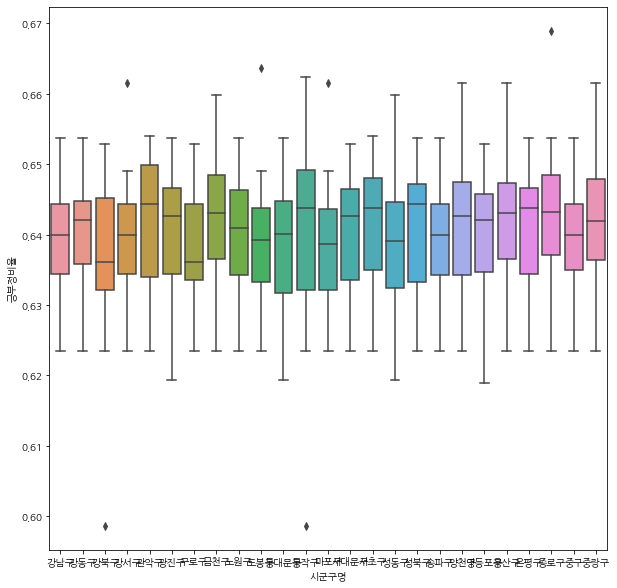

In [ ]:
anova('Í∏çÎ∂ÄÏ†ïÎπÑÏú®~C(ÏãúÍµ∞Íµ¨Î™Ö)+C(month)',month_buzz_total)

RCBDÎ•º ÌÜµÌïú ANOVA Í≤∞Í≥º, ÏûêÏπòÍµ¨Î≥Ñ Í∏çÎ∂ÄÏ†ïÎπÑÏú®Ïùò Ï∞®Ïù¥Îäî ÎÇòÌÉÄÎÇòÏßÄ ÏïäÏßÄÎßå, ÏõîÎ≥Ñ Ï∞®Ïù¥Îäî ÎÇòÌÉÄÎÇòÎäîÍ≤ÉÏùÑ ÌôïÏù∏ Í∞ÄÎä•Ìï®.  
1. Ïù¥Î•º Ìï¥ÏÜåÌïòÍ∏∞ ÏúÑÌï¥ÏÑú ÏõîÎ≥Ñ Îç∞Ïù¥ÌÑ∞Î•º Ïó∞Í∞Ñ ÏûêÏπòÍµ¨Î≥Ñ Îç∞Ïù¥ÌÑ∞Î°ú Ìï©ÏπòÎäî Í≥ºÏ†ïÏóêÏÑú Í∞ÄÏ§ëÌèâÍ∑†ÏúºÎ°ú Í≥ÑÏÇ∞!  
2. ÏûêÏπòÍµ¨Î≥Ñ Í∏çÎ∂ÄÏ†ïÎπÑÏú®Ïùò Ï∞®Ïù¥Í∞Ä ÌÜµÍ≥ÑÏ†ÅÏúºÎ°ú Ïú†ÏùòÎØ∏ÌïòÏßÄ ÏïäÍ∏∞ ÎïåÎ¨∏Ïóê, ÏûêÏπòÍµ¨ Î≥Ñ Í∏çÎ∂ÄÏ†ï ÎπÑÏú®Ïùò ÌèâÍ∑† Ï∞®Ïù¥Îäî ÎÇòÏßÄ ÏïäÏúºÎ©∞, Îî∞ÎùºÏÑú Í∏∞ÎåìÍ∞íÏ†ÅÏúºÎ°ú ÏûêÏπòÍµ¨Ïóê ÎåÄÌï¥ÏÑú Ïñ∏Í∏âÏù¥ ÎßéÏù¥ Îê† ÏàòÎ°ù Í∏çÏ†ïÏ†ÅÏúºÎ°ú Ïñ∏Í∏âÎêúÎã§Í≥† ÌåêÎã®, ÏõîÍ∞Ñ ÏãúÎèÑÏñ∏Í∏âÎüâÏùÑ Î∞îÌÉïÏúºÎ°ú ÌôòÍ≤ΩÏù∏ÏãùÏßÄÏàòÏóê Ïì∞Ïùº ÏßÄÌëúÎ•º ÎßåÎì§Ïûê!

In [ ]:
#monthÏùò ÏòÅÌñ•ÏùÑ Î∞òÏòÅÌïòÍ∏∞ ÏúÑÌï¥ÏÑú Ï¥ù Ïñ∏Í∏â ÌöüÏàòÎ•º ÌôúÏö©Ìïú Ìï¥ÎãπÍ∏∞Í∞Ñ Í∞ÄÏ§ëÌèâÍ∑†ÏùÑ ÏÇ¨Ïö©
annual_buzz_total_w=month_buzz_total.groupby('ÏãúÍµ∞Íµ¨Î™Ö')
weighted_avg_func = lambda g:np.average(g['Ï£ºÍ∞ÑÏãúÎèÑÏñ∏Í∏âÎüâ'], weights=g['Í∏çÎ∂ÄÏ†ïÎπÑÏú®'])
annual_buzz_total_w=pd.DataFrame(annual_buzz_total_w.apply(weighted_avg_func))
annual_buzz_total_w.columns=['ÏõîÍ∞ÑÏãúÎèÑÏñ∏Í∏âÎüâ_Í∞ÄÏ§ëÌèâÍ∑†']
annual_buzz_total_w['ÏõîÍ∞ÑÏãúÎèÑÏñ∏Í∏âÎüâ_ÌèâÍ∑†']=month_buzz_total.groupby('ÏãúÍµ∞Íµ¨Î™Ö').mean()['Ï£ºÍ∞ÑÏãúÎèÑÏñ∏Í∏âÎüâ']
annual_buzz_total_w['ÏõîÍ∞ÑÏãúÎèÑÏñ∏Í∏âÎüâ_Ï∞®Ïù¥']=annual_buzz_total_w['ÏõîÍ∞ÑÏãúÎèÑÏñ∏Í∏âÎüâ_Í∞ÄÏ§ëÌèâÍ∑†']-annual_buzz_total_w['ÏõîÍ∞ÑÏãúÎèÑÏñ∏Í∏âÎüâ_ÌèâÍ∑†']
annual_buzz_total_w=annual_buzz_total_w.reset_index()
display(annual_buzz_total_w)

ÏãúÍµ∞Íµ¨Î™Ö  ÏõîÍ∞ÑÏãúÎèÑÏñ∏Í∏âÎüâ_Í∞ÄÏ§ëÌèâÍ∑†  ÏõîÍ∞ÑÏãúÎèÑÏñ∏Í∏âÎüâ_ÌèâÍ∑†  ÏõîÍ∞ÑÏãúÎèÑÏñ∏Í∏âÎüâ_Ï∞®Ïù¥
0    Í∞ïÎÇ®Íµ¨     33.099593   33.000000    0.099593
1    Í∞ïÎèôÍµ¨     35.679070   35.666667    0.012403
2    Í∞ïÎ∂ÅÍµ¨     11.527956   11.416667    0.111289
3    Í∞ïÏÑúÍµ¨     49.877990   49.916667   -0.038677
4    Í¥ÄÏïÖÍµ¨     11.323044   11.333333   -0.010289
5    Í¥ëÏßÑÍµ¨     20.034817   20.000000    0.034817
6    Íµ¨Î°úÍµ¨     10.209675   10.166667    0.043008
7    Í∏àÏ≤úÍµ¨      9.077973    9.083333   -0.005360
8    ÎÖ∏ÏõêÍµ¨     32.842323   32.833333    0.008990
9    ÎèÑÎ¥âÍµ¨     11.015465   11.000000    0.015465
10  ÎèôÎåÄÎ¨∏Íµ¨      9.374066    9.333333    0.040733
11   ÎèôÏûëÍµ¨      9.039796    9.000000    0.039796
12   ÎßàÌè¨Íµ¨     17.545467   17.500000    0.045467
13  ÏÑúÎåÄÎ¨∏Íµ¨      9.527866    9.500000    0.027866
14   ÏÑúÏ¥àÍµ¨     15.806482   15.833333   -0.026852
15   ÏÑ±ÎèôÍµ¨     14.754290   14.750000    0.004290
16   ÏÑ±Î∂ÅÍµ¨     10.194001   10.166667    0.027334
17   ÏÜ°ÌååÍµ¨     31.175644   31.083333    0.092311
18   ÏñëÏ≤úÍµ¨     11.074876   11.083333   -0.008457
19  ÏòÅÎì±Ìè¨Íµ¨      8.377215    8.333333    0.043881
20   Ïö©ÏÇ∞Íµ¨     10.400499   10.416667   -0.016168
21   ÏùÄÌèâÍµ¨     16.249448   16.250000   -0.000552
22   Ï¢ÖÎ°úÍµ¨     10.509811   10.500000    0.009811
23    Ï§ëÍµ¨     30.121291   30.000000    0.121291
24   Ï§ëÎûëÍµ¨     11.194284   11.166667    0.027617

### ÏóêÏΩîÎßàÏùºÎ¶¨ÏßÄ Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨

In [ ]:
annual_eco_private = pd.read_csv('/content/drive/Shareddrives/üê£DATAMINING_22_1üê£/Ï£ºÏ†úÎ∂ÑÏÑù/data/ÌôòÍ≤ΩÏù∏ÏãùÏßÄÏàò/2020_2021Í∞úÏù∏ÏóêÏΩîÎßàÏùºÎ¶¨ÏßÄ.csv', encoding = 'utf-8')
annual_eco_private['ÌÉÑÏÜåÍ∞êÏ∂ïÎüâ']=424*annual_eco_private['Í∞êÏ∂ïÎüâ(Ï†ÑÍ∏∞)']+332*annual_eco_private['Í∞êÏ∂ïÎüâ(ÏàòÎèÑ)']+2240*(annual_eco_private['Í∞êÏ∂ïÎüâ(Í∞ÄÏä§)']+annual_eco_private['Í∞êÏ∂ïÎüâ(ÏßÄÏó≠ÎÇúÎ∞©)'])
#ÌÉÑÏÜåÍ∞êÏ∂ïÎüâ Í≥µÏãùÏùÑ ÌôúÏö©ÌïòÏó¨ ÌååÏÉùÎ≥ÄÏàò ÏÉùÏÑ±
annual_eco_private['ÌÉÑÏÜåÎ∞∞Ï∂úÎüâ']=424*annual_eco_private['ÌòÑÏû¨ÏÇ¨Ïö©Îüâ(Ï†ÑÍ∏∞)']+332*annual_eco_private['ÌòÑÏû¨ÏÇ¨Ïö©Îüâ(ÏàòÎèÑ)']+2240*(annual_eco_private['ÌòÑÏû¨ÏÇ¨Ïö©Îüâ(Í∞ÄÏä§)']+annual_eco_private['ÌòÑÏû¨ÏÇ¨Ïö©Îüâ(ÏßÄÏó≠ÎÇúÎ∞©)'])
#Ïù¥Î•º ÌòÑÏû¨ ÏÇ¨Ïö©ÎüâÏóê Ï†ÅÏö©ÌïòÏó¨ ÌÉÑÏÜåÎ∞∞Ï∂úÎüâ ÌååÏÉùÎ≥ÄÏàò ÏÉùÏÑ±
annual_eco_private['ÌÉÑÏÜåÍ∞êÏ∂ïÎüâ']=annual_eco_private['ÌÉÑÏÜåÍ∞êÏ∂ïÎüâ']/1000 #kgCO2Î°ú ÌôòÏÇ∞
for i in ['Ï†ÑÍ∏∞','Í∞ÄÏä§','ÏàòÎèÑ','ÏßÄÏó≠ÎÇúÎ∞©']:
  annual_eco_private=annual_eco_private.drop([
                                              'Ï†ÑÎÖÑÏÇ¨Ïö©Îüâ({})'.format(i),
                                              'Ï†ÑÏ†ÑÎÖÑÏÇ¨Ïö©Îüâ({})'.format(i)
                                              ], axis=1)
annual_eco_private['current_use']=annual_eco_private['ÌòÑÏû¨ÏÇ¨Ïö©Îüâ(Ï†ÑÍ∏∞)']+annual_eco_private['ÌòÑÏû¨ÏÇ¨Ïö©Îüâ(ÏàòÎèÑ)']+annual_eco_private['ÌòÑÏû¨ÏÇ¨Ïö©Îüâ(Í∞ÄÏä§)']+annual_eco_private['ÌòÑÏû¨ÏÇ¨Ïö©Îüâ(ÏßÄÏó≠ÎÇúÎ∞©)']
#Îã®ÏúÑÏóê ÏÉÅÍ¥ÄÏóÜÏù¥ ÏÇ¨Ïö©Ìïú ÏñëÏùò Ï¥ùÌï©ÏùÑ ÌòÑÏû¨ÏÇ¨Ïö©ÎüâÏúºÎ°ú Ï†ïÏùòÌïòÏó¨ ÌååÏÉùÎ≥ÄÏàò ÏÉùÏÑ±

df        sum_sq       mean_sq         F    PR(>F)
C(Íµ¨Ï≤≠ÏΩîÎìú)    24.0  1.115547e+05   4648.113549  0.915194  0.581358
C(Ïõî)       11.0  2.526016e+05  22963.783401  4.521471  0.000003
Residual  264.0  1.340811e+06   5078.830714       NaN       NaN

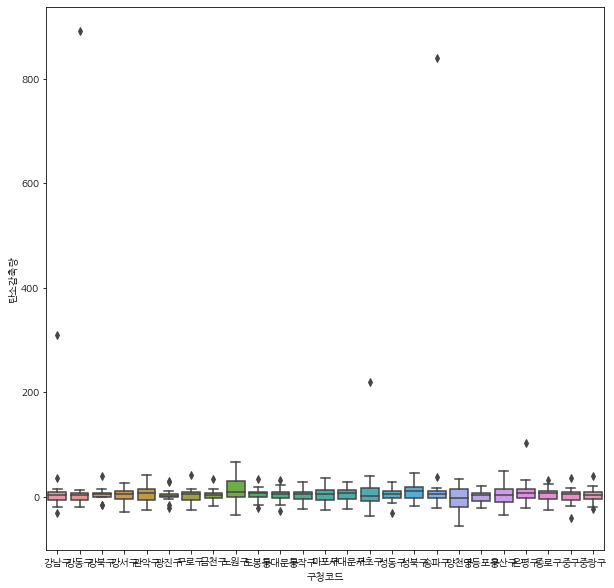

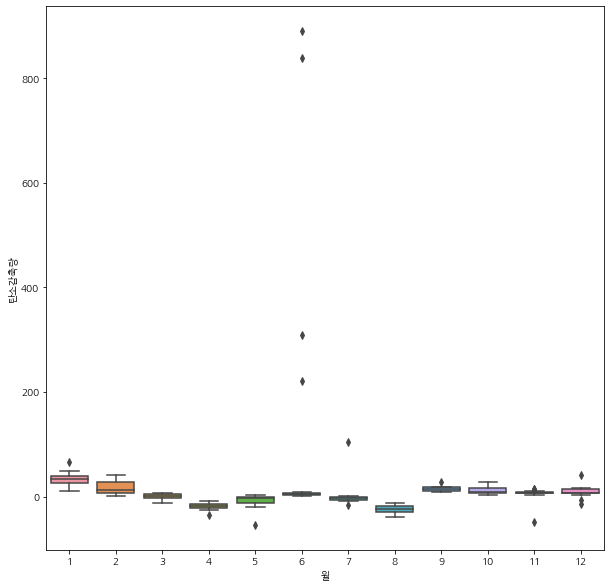



Residual Plot


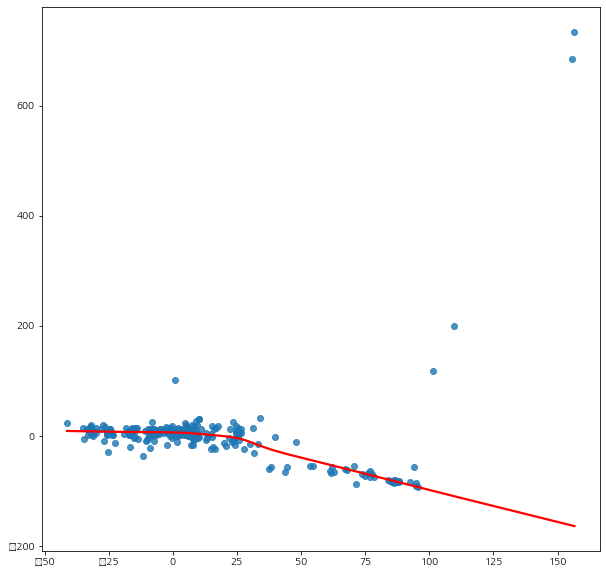



Normal Q-Q Plot




P-value of Shapiro-Wilks test : 0.0


In [ ]:
anova('ÌÉÑÏÜåÍ∞êÏ∂ïÎüâ~C(Íµ¨Ï≤≠ÏΩîÎìú)+C(Ïõî)',annual_eco_private,True)

Ïú†ÏùòÎØ∏Ìïú Ï∞®Ïù¥Í∞Ä ÎÇòÌÉÄÎÇ† Í≤ÉÏúºÎ°ú ÏòàÏÉÅÎêòÎçò ÌÉÑÏÜåÍ∞êÏ∂ïÎüâÏù¥ Ï∞®Ïù¥ÎÇòÏßÄ ÏïäÏïÑ  
Î™®Îç∏Ï†ÅÌï©ÏÑ±ÏùÑ ÌôïÏù∏Ìï¥Î≥∏ Í≤∞Í≥º Ïù¥ÏÉÅÏπòÎ°ú Ïù∏Ìï¥ Í∞íÎì§Ïù¥ Í∞ïÌïòÍ≤å ÏòÅÌñ•ÏùÑ Î∞õÍ≥† ÏûàÏùåÏùÑ ÌôïÏù∏ Ìï† Ïàò ÏûàÏóàÏùå  
-> ÌÉÑÏÜå Í∞êÏ∂ïÎüâ ÎåÄÏã† ÌÉÑÏÜå Î∞∞Ï∂úÎüâÏúºÎ°ú Îã§Ïãú ANOVAÎ•º Ïã§ÏãúÌï®

df        sum_sq       mean_sq          F        PR(>F)
C(Íµ¨Ï≤≠ÏΩîÎìú)    24.0  3.534469e+11  1.472695e+10   1.952616  5.990445e-03
C(Ïõî)       11.0  1.453113e+12  1.321012e+11  17.515019  6.060939e-26
Residual  264.0  1.991131e+12  7.542164e+09        NaN           NaN

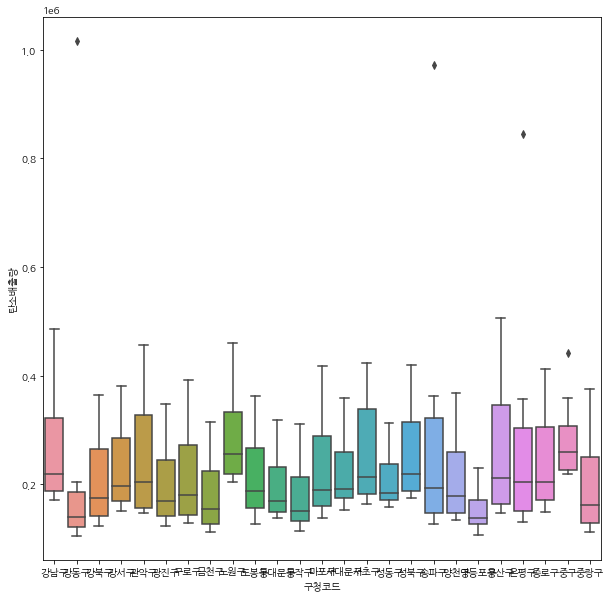

In [ ]:
anova('ÌÉÑÏÜåÎ∞∞Ï∂úÎüâ~C(Íµ¨Ï≤≠ÏΩîÎìú)+C(Ïõî)',annual_eco_private)

ÌÉÑÏÜå Î∞∞Ï∂úÎüâÏúºÎ°ú ANOVAÎ•º Îã§Ïãú ÏßÑÌñâÌïòÏòÄÏùÑ Îïå, Ïú†ÏùòÌïú Í≤∞Í≥ºÎ•º ÏñªÏùÑ Ïàò ÏûàÏóàÍ≥†,  
Ï£ºÍ∞Ñ Î≤ÑÏ¶à Îç∞Ïù¥ÌÑ∞Î•º Ï†ÑÏ≤òÎ¶¨Ìï† ÎïåÏôÄ ÎßàÏ∞¨Í∞ÄÏßÄÎ°ú ÌòÑÏû¨ ÏÇ¨Ïö©ÎüâÏùÑ Í∏∞Ï§ÄÏúºÎ°ú Í∞ÄÏ§ëÌèâÍ∑†ÏùÑ Îß§Í≤® ÏûêÏπòÍµ¨Î≥Ñ Îç∞Ïù¥ÌÑ∞Î°ú Î≥ÄÌôò

In [ ]:
annual_eco_private_month=annual_eco_private.groupby('Íµ¨Ï≤≠ÏΩîÎìú')
weighted_avg_func1 = lambda g:np.average(g['ÌÉÑÏÜåÎ∞∞Ï∂úÎüâ'], weights=g['current_use'])
annual_eco_private_month_w=pd.DataFrame(annual_eco_private_month.apply(weighted_avg_func1))
annual_eco_private_month_w.columns=['ÏõîÍ∞ÑÌÉÑÏÜåÎ∞∞Ï∂úÎüâ_Í∞ÄÏ§ëÌèâÍ∑†']
annual_eco_private_month_w['ÏõîÍ∞ÑÌÉÑÏÜåÎ∞∞Ï∂úÎüâ_ÌèâÍ∑†']=annual_eco_private.groupby('Íµ¨Ï≤≠ÏΩîÎìú').mean()['ÌÉÑÏÜåÎ∞∞Ï∂úÎüâ']
annual_eco_private_month_w=annual_eco_private_month_w.reset_index()
display(annual_eco_private_month_w)

Íµ¨Ï≤≠ÏΩîÎìú   ÏõîÍ∞ÑÌÉÑÏÜåÎ∞∞Ï∂úÎüâ_Í∞ÄÏ§ëÌèâÍ∑†     ÏõîÍ∞ÑÌÉÑÏÜåÎ∞∞Ï∂úÎüâ_ÌèâÍ∑†
0    Í∞ïÎÇ®Íµ¨  270159.157129  260018.008543
1    Í∞ïÎèôÍµ¨  311295.615860  218960.665101
2    Í∞ïÎ∂ÅÍµ¨  214130.145681  205200.805915
3    Í∞ïÏÑúÍµ¨  240238.566457  232627.514816
4    Í¥ÄÏïÖÍµ¨  270333.165122  252564.305027
5    Í¥ëÏßÑÍµ¨  200502.392464  194965.042650
6    Íµ¨Î°úÍµ¨  225470.710469  213583.909531
7    Í∏àÏ≤úÍµ¨  187433.202201  179438.879598
8    ÎÖ∏ÏõêÍµ¨  296657.371517  289111.526447
9    ÎèÑÎ¥âÍµ¨  222265.768553  214525.705221
10  ÎèôÎåÄÎ¨∏Íµ¨  197340.712374  192307.407700
11   ÎèôÏûëÍµ¨  188980.286594  182186.665432
12   ÎßàÌè¨Íµ¨  247776.497407  235469.462222
13  ÏÑúÎåÄÎ¨∏Íµ¨  231789.300274  226780.471599
14   ÏÑúÏ¥àÍµ¨  265127.455837  256070.255467
15   ÏÑ±ÎèôÍµ¨  210922.941440  207714.239442
16   ÏÑ±Î∂ÅÍµ¨  260691.940067  252626.505294
17   ÏÜ°ÌååÍµ¨  341085.293158  277619.754407
18   ÏñëÏ≤úÍµ¨  216638.229980  209660.652858
19  ÏòÅÎì±Ìè¨Íµ¨  157083.581295  154520.236545
20   Ïö©ÏÇ∞Íµ¨  280562.910572  262361.724561
21   ÏùÄÌèâÍµ¨  316499.200614  267246.223823
22   Ï¢ÖÎ°úÍµ¨  250734.605932  238494.873175
23    Ï§ëÍµ¨  282067.590684  276797.459648
24   Ï§ëÎûëÍµ¨  209399.930971  196645.423101

### ÏûêÏπòÍµ¨Î≥Ñ Ïì∞Î†àÍ∏∞ Î∞∞Ï∂úÎüâ Ï†ÑÏ≤òÎ¶¨

ÏûêÏπòÍµ¨Î≥Ñ Ïû¨ÌôúÏö©Î•†ÏùÑ ÌôòÍ≤ΩÏù∏ÏãùÏßÄÏàòÏóê ÏÇ¨Ïö©

In [ ]:
gu_recycle = pd.read_csv('/content/drive/Shareddrives/üê£DATAMINING_22_1üê£/Ï£ºÏ†úÎ∂ÑÏÑù/data/1Ï∞® Ï†ÑÏ≤òÎ¶¨/Ïì∞Î†àÍ∏∞Î∞∞Ï∂úÎüâ/ÌñâÏ†ïÎèô Î≥Ñ Ïì∞Î†àÍ∏∞ Î∞∞Ï∂úÎüâ.csv', encoding = 'cp949',)
gu_recycle=gu_recycle.drop(['ÏùåÏãùÎ¨º','Ïû¨ÌôúÏö©','Ìï©Í≥Ñ','ÌòºÌï©Î∞∞Ï∂ú','Unnamed: 0'],axis=1)
display(gu_recycle)

ÏãúÍµ∞Íµ¨  Ïû¨ÌôúÏö©rate
0    Í∞ïÎÇ®Íµ¨    0.293
1    ÏÜ°ÌååÍµ¨    0.432
2    ÏÑúÏ¥àÍµ¨    0.278
3    Í∞ïÏÑúÍµ¨    0.365
4   ÎèôÎåÄÎ¨∏Íµ¨    0.521
5    ÎÖ∏ÏõêÍµ¨    0.338
6   ÏòÅÎì±Ìè¨Íµ¨    0.277
7    Í¥ÄÏïÖÍµ¨    0.426
8    ÏñëÏ≤úÍµ¨    0.374
9    Í∞ïÎèôÍµ¨    0.371
10   ÎßàÌè¨Íµ¨    0.353
11   ÏùÄÌèâÍµ¨    0.272
12   Ï§ëÎûëÍµ¨    0.408
13   ÏÑ±Î∂ÅÍµ¨    0.392
14   Íµ¨Î°úÍµ¨    0.265
15   Í¥ëÏßÑÍµ¨    0.410
16   ÎèôÏûëÍµ¨    0.452
17    Ï§ëÍµ¨    0.303
18   Ïö©ÏÇ∞Íµ¨    0.368
19  ÏÑúÎåÄÎ¨∏Íµ¨    0.336
20   Ï¢ÖÎ°úÍµ¨    0.286
21   ÏÑ±ÎèôÍµ¨    0.362
22   ÎèÑÎ¥âÍµ¨    0.431
23   Í∞ïÎ∂ÅÍµ¨    0.231
24   Í∏àÏ≤úÍµ¨    0.353

### ÌôòÍ≤ΩÏù∏ÏãùÏßÄÏàò ÏÉùÏÑ±

ÏàòÏßëÌïú ÏõîÍ∞Ñ ÌÉÑÏÜåÎ∞∞Ï∂úÎüâ Í∞ÄÏ§ëÌèâÍ∑†, ÏõîÍ∞ÑÏãúÎèÑÏñ∏Í∏âÎüâ Í∞ÄÏ§ëÌèâÍ∑†, Íµ¨Î≥Ñ Ïû¨ÌôúÏö©Î•†ÏùÑ ÌïòÎÇòÏùò Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏúºÎ°ú Î¨∂Ïñ¥Ï§å.

In [ ]:
annual_summarise=pd.merge(annual_eco_private_month_w,annual_buzz_total_w, how="inner", left_on='Íµ¨Ï≤≠ÏΩîÎìú', right_on='ÏãúÍµ∞Íµ¨Î™Ö')
annual_summarise=pd.merge(annual_summarise ,gu_recycle, how="inner", left_on='Íµ¨Ï≤≠ÏΩîÎìú', right_on='ÏãúÍµ∞Íµ¨')
annual_summarise=annual_summarise.drop(['ÏõîÍ∞ÑÌÉÑÏÜåÎ∞∞Ï∂úÎüâ_ÌèâÍ∑†','ÏãúÍµ∞Íµ¨Î™Ö','ÏõîÍ∞ÑÏãúÎèÑÏñ∏Í∏âÎüâ_ÌèâÍ∑†','ÏõîÍ∞ÑÏãúÎèÑÏñ∏Í∏âÎüâ_Ï∞®Ïù¥','ÏãúÍµ∞Íµ¨'],axis=1)
annual_summarise.columns=['ÏãúÍµ∞Íµ¨Î™Ö','ÏõîÍ∞ÑÌÉÑÏÜåÎ∞∞Ï∂úÎüâ_Í∞ÄÏ§ëÌèâÍ∑†',	'ÏõîÍ∞ÑÏãúÎèÑÏñ∏Í∏âÎüâ_Í∞ÄÏ§ëÌèâÍ∑†','Íµ¨Î≥Ñ_Ïû¨ÌôúÏö©Î•†']
annual_summarise_data=annual_summarise.set_index('ÏãúÍµ∞Íµ¨Î™Ö')
display(annual_summarise_data)

ÏõîÍ∞ÑÌÉÑÏÜåÎ∞∞Ï∂úÎüâ_Í∞ÄÏ§ëÌèâÍ∑†  ÏõîÍ∞ÑÏãúÎèÑÏñ∏Í∏âÎüâ_Í∞ÄÏ§ëÌèâÍ∑†  Íµ¨Î≥Ñ_Ïû¨ÌôúÏö©Î•†
ÏãúÍµ∞Íµ¨Î™Ö                                      
Í∞ïÎÇ®Íµ¨   270159.157129     33.099593    0.293
Í∞ïÎèôÍµ¨   311295.615860     35.679070    0.371
Í∞ïÎ∂ÅÍµ¨   214130.145681     11.527956    0.231
Í∞ïÏÑúÍµ¨   240238.566457     49.877990    0.365
Í¥ÄÏïÖÍµ¨   270333.165122     11.323044    0.426
Í¥ëÏßÑÍµ¨   200502.392464     20.034817    0.410
Íµ¨Î°úÍµ¨   225470.710469     10.209675    0.265
Í∏àÏ≤úÍµ¨   187433.202201      9.077973    0.353
ÎÖ∏ÏõêÍµ¨   296657.371517     32.842323    0.338
ÎèÑÎ¥âÍµ¨   222265.768553     11.015465    0.431
ÎèôÎåÄÎ¨∏Íµ¨  197340.712374      9.374066    0.521
ÎèôÏûëÍµ¨   188980.286594      9.039796    0.452
ÎßàÌè¨Íµ¨   247776.497407     17.545467    0.353
ÏÑúÎåÄÎ¨∏Íµ¨  231789.300274      9.527866    0.336
ÏÑúÏ¥àÍµ¨   265127.455837     15.806482    0.278
ÏÑ±ÎèôÍµ¨   210922.941440     14.754290    0.362
ÏÑ±Î∂ÅÍµ¨   260691.940067     10.194001    0.392
ÏÜ°ÌååÍµ¨   341085.293158     31.175644    0.432
ÏñëÏ≤úÍµ¨   216638.229980     11.074876    0.374
ÏòÅÎì±Ìè¨Íµ¨  157083.581295      8.377215    0.277
Ïö©ÏÇ∞Íµ¨   280562.910572     10.400499    0.368
ÏùÄÌèâÍµ¨   316499.200614     16.249448    0.272
Ï¢ÖÎ°úÍµ¨   250734.605932     10.509811    0.286
Ï§ëÍµ¨    282067.590684     30.121291    0.303
Ï§ëÎûëÍµ¨   209399.930971     11.194284    0.408

In [ ]:
scaler1 = StandardScaler()   
scaler1_result = scaler1.fit_transform(annual_summarise_data)
scaler2 = MinMaxScaler()
scaler2_result = scaler2.fit_transform(annual_summarise_data)
annual_summarise[['ÌëúÏ§ÄÌôîÌÉÑÏÜåÎ∞∞Ï∂úÎüâ','ÌëúÏ§ÄÌôîÏãúÎèÑÏñ∏Í∏âÎüâ','ÌëúÏ§ÄÌôîÏû¨ÌôúÏö©Î•†']]=scaler1_result
annual_summarise[['MinMaxÌëúÏ§ÄÌôîÌÉÑÏÜåÎ∞∞Ï∂úÎüâ','MinMaxÌëúÏ§ÄÌôîÏãúÎèÑÏñ∏Í∏âÎüâ','MinMaxÌëúÏ§ÄÌôîÏû¨ÌôúÏö©Î•†']]=scaler2_result
display(annual_summarise)

ÏãúÍµ∞Íµ¨Î™Ö   ÏõîÍ∞ÑÌÉÑÏÜåÎ∞∞Ï∂úÎüâ_Í∞ÄÏ§ëÌèâÍ∑†  ÏõîÍ∞ÑÏãúÎèÑÏñ∏Í∏âÎüâ_Í∞ÄÏ§ëÌèâÍ∑†  Íµ¨Î≥Ñ_Ïû¨ÌôúÏö©Î•†  ÌëúÏ§ÄÌôîÌÉÑÏÜåÎ∞∞Ï∂úÎüâ  ÌëúÏ§ÄÌôîÏãúÎèÑÏñ∏Í∏âÎüâ   ÌëúÏ§ÄÌôîÏû¨ÌôúÏö©Î•†  \
0    Í∞ïÎÇ®Íµ¨  270159.157129     33.099593    0.293  0.591064  1.419525 -0.922416   
1    Í∞ïÎèôÍµ¨  311295.615860     35.679070    0.371  1.513747  1.655785  0.221802   
2    Í∞ïÎ∂ÅÍµ¨  214130.145681     11.527956    0.231 -0.665657 -0.556274 -1.831923   
3    Í∞ïÏÑúÍµ¨  240238.566457     49.877990    0.365 -0.080050  2.956299  0.133786   
4    Í¥ÄÏïÖÍµ¨  270333.165122     11.323044    0.426  0.594967 -0.575042  1.028623   
5    Í¥ëÏßÑÍµ¨  200502.392464     20.034817    0.410 -0.971325  0.222890  0.793912   
6    Íµ¨Î°úÍµ¨  225470.710469     10.209675    0.265 -0.411290 -0.677019 -1.333161   
7    Í∏àÏ≤úÍµ¨  187433.202201      9.077973    0.353 -1.264464 -0.780674 -0.042248   
8    ÎÖ∏ÏõêÍµ¨  296657.371517     32.842323    0.338  1.185414  1.395961 -0.262290   
9    ÎèÑÎ¥âÍµ¨  222265.768553     11.015465    0.431 -0.483176 -0.603214  1.101970   
10  ÎèôÎåÄÎ¨∏Íµ¨  197340.712374      9.374066    0.521 -1.042241 -0.753554  2.422222   
11   ÎèôÏûëÍµ¨  188980.286594      9.039796    0.452 -1.229763 -0.784171  1.410029   
12   ÎßàÌè¨Íµ¨  247776.497407     17.545467    0.353  0.089025 -0.005116 -0.042248   
13  ÏÑúÎåÄÎ¨∏Íµ¨  231789.300274      9.527866    0.336 -0.269565 -0.739467 -0.291629   
14   ÏÑúÏ¥àÍµ¨  265127.455837     15.806482    0.278  0.478203 -0.164393 -1.142458   
15   ÏÑ±ÎèôÍµ¨  210922.941440     14.754290    0.362 -0.737594 -0.260766  0.089777   
16   ÏÑ±Î∂ÅÍµ¨  260691.940067     10.194001    0.392  0.378716 -0.678454  0.529861   
17   ÏÜ°ÌååÍµ¨  341085.293158     31.175644    0.432  2.181924  1.243306  1.116640   
18   ÏñëÏ≤úÍµ¨  216638.229980     11.074876    0.374 -0.609401 -0.597773  0.265811   
19  ÏòÅÎì±Ìè¨Íµ¨  157083.581295      8.377215    0.277 -1.945201 -0.844858 -1.157128   
20   Ïö©ÏÇ∞Íµ¨  280562.910572     10.400499    0.368  0.824418 -0.659541  0.177794   
21   ÏùÄÌèâÍµ¨  316499.200614     16.249448    0.272  1.630462 -0.123821 -1.230475   
22   Ï¢ÖÎ°úÍµ¨  250734.605932     10.509811    0.286  0.155375 -0.649528 -1.025102   
23    Ï§ëÍµ¨  282067.590684     30.121291    0.303  0.858168  1.146735 -0.775721   
24   Ï§ëÎûëÍµ¨  209399.930971     11.194284    0.408 -0.771755 -0.586836  0.764573   

    MinMaxÌëúÏ§ÄÌôîÌÉÑÏÜåÎ∞∞Ï∂úÎüâ  MinMaxÌëúÏ§ÄÌôîÏãúÎèÑÏñ∏Í∏âÎüâ  MinMaxÌëúÏ§ÄÌôîÏû¨ÌôúÏö©Î•†  
0         0.614535        0.595709       0.213793  
1         0.838101        0.657864       0.482759  
2         0.310033        0.075920       0.000000  
3         0.451925        1.000000       0.462069  
4         0.615481        0.070983       0.672414  
5         0.235970        0.280901       0.617241  
6         0.371666        0.044155       0.117241  
7         0.164942        0.016885       0.420690  
8         0.758546        0.589510       0.368966  
9         0.354248        0.063571       0.689655  
10        0.218787        0.024020       1.000000  
11        0.173350        0.015966       0.762069  
12        0.492892        0.220918       0.420690  
13        0.406006        0.027726       0.362069  
14        0.587190        0.179015       0.162069  
15        0.292602        0.153662       0.451724  
16        0.563084        0.043777       0.555172  
17        1.000000        0.549349       0.693103  
18        0.323664        0.065003       0.493103  
19        0.000000        0.000000       0.158621  
20        0.671077        0.048753       0.472414  
21        0.866381        0.189689       0.141379  
22        0.508968        0.051387       0.189655  
23        0.679255        0.523944       0.248276  
24        0.284325        0.067880       0.610345

Ìï¥Îãπ Î≥ÄÏàòÎì§Ïóê ÎåÄÌï¥ÏÑú Standard ScalingÍ≥º Min-Max ScalingÏùÑ ÏßÑÌñâÌïòÏòÄÍ≥†, Ìï¥Îãπ Í≤∞Í≥ºÎì§ÏùÑ ÎπÑÍµêÌï¥Î≥¥ÏïòÏùÑ Îïå, Ïñ¥Îñ†Ìïú ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅÏùò Î≥ÄÏàòÎ°úÏÑú ÏÇ¨Ïö©ÌïòÍ∏∞ÏóêÎäî Standard ScalingÏùÑ ÏßÑÌñâÌïú Í≤ÉÎì§Ïù¥, Ïñ¥Îñ†Ìïú ÏßÄÏàòÎ•º ÏÉùÏÑ±ÌïòÍ∏∞ÏóêÎäî Min-Max ScalingÏùÑ ÏßÑÌñâÌïú Í≤ÉÏù¥ Îçî Ï¢ãÎã§Í≥† ÌåêÎã®ÌïòÏòÄÍ≥†, Min-Max scalingÏùÑ ÏßÑÌñâÌïú Í∞íÏùÑ Î∞îÌÉïÏúºÎ°ú ÌôòÍ≤ΩÏù∏ÏãùÏßÄÏàòÎ•º ÏÉùÏÑ±Ìï¥Ï£ºÏóàÏùå.

In [ ]:
minmax_annual_summarise=annual_summarise[['ÏãúÍµ∞Íµ¨Î™Ö','MinMaxÌëúÏ§ÄÌôîÌÉÑÏÜåÎ∞∞Ï∂úÎüâ',	'MinMaxÌëúÏ§ÄÌôîÏãúÎèÑÏñ∏Í∏âÎüâ','MinMaxÌëúÏ§ÄÌôîÏû¨ÌôúÏö©Î•†']]
minmax_annual_summarise['1-MinMaxÌëúÏ§ÄÌôîÌÉÑÏÜåÎ∞∞Ï∂úÎüâ']=round(1-minmax_annual_summarise['MinMaxÌëúÏ§ÄÌôîÌÉÑÏÜåÎ∞∞Ï∂úÎüâ'],6)
minmax_annual_summarise['ÌôòÍ≤ΩÏù∏ÏãùÏßÄÏàò']=(minmax_annual_summarise['1-MinMaxÌëúÏ§ÄÌôîÌÉÑÏÜåÎ∞∞Ï∂úÎüâ']+minmax_annual_summarise['MinMaxÌëúÏ§ÄÌôîÏãúÎèÑÏñ∏Í∏âÎüâ']
                                   +minmax_annual_summarise['MinMaxÌëúÏ§ÄÌôîÏû¨ÌôúÏö©Î•†'])/3
eco_aware_coef=minmax_annual_summarise[['ÏãúÍµ∞Íµ¨Î™Ö','ÌôòÍ≤ΩÏù∏ÏãùÏßÄÏàò']]
display(minmax_annual_summarise)

ÏãúÍµ∞Íµ¨Î™Ö  MinMaxÌëúÏ§ÄÌôîÌÉÑÏÜåÎ∞∞Ï∂úÎüâ  MinMaxÌëúÏ§ÄÌôîÏãúÎèÑÏñ∏Í∏âÎüâ  MinMaxÌëúÏ§ÄÌôîÏû¨ÌôúÏö©Î•†  1-MinMaxÌëúÏ§ÄÌôîÌÉÑÏÜåÎ∞∞Ï∂úÎüâ  \
0    Í∞ïÎÇ®Íµ¨        0.614535        0.595709       0.213793          0.385465   
1    Í∞ïÎèôÍµ¨        0.838101        0.657864       0.482759          0.161899   
2    Í∞ïÎ∂ÅÍµ¨        0.310033        0.075920       0.000000          0.689967   
3    Í∞ïÏÑúÍµ¨        0.451925        1.000000       0.462069          0.548075   
4    Í¥ÄÏïÖÍµ¨        0.615481        0.070983       0.672414          0.384519   
5    Í¥ëÏßÑÍµ¨        0.235970        0.280901       0.617241          0.764030   
6    Íµ¨Î°úÍµ¨        0.371666        0.044155       0.117241          0.628334   
7    Í∏àÏ≤úÍµ¨        0.164942        0.016885       0.420690          0.835058   
8    ÎÖ∏ÏõêÍµ¨        0.758546        0.589510       0.368966          0.241454   
9    ÎèÑÎ¥âÍµ¨        0.354248        0.063571       0.689655          0.645752   
10  ÎèôÎåÄÎ¨∏Íµ¨        0.218787        0.024020       1.000000          0.781213   
11   ÎèôÏûëÍµ¨        0.173350        0.015966       0.762069          0.826650   
12   ÎßàÌè¨Íµ¨        0.492892        0.220918       0.420690          0.507108   
13  ÏÑúÎåÄÎ¨∏Íµ¨        0.406006        0.027726       0.362069          0.593994   
14   ÏÑúÏ¥àÍµ¨        0.587190        0.179015       0.162069          0.412810   
15   ÏÑ±ÎèôÍµ¨        0.292602        0.153662       0.451724          0.707398   
16   ÏÑ±Î∂ÅÍµ¨        0.563084        0.043777       0.555172          0.436916   
17   ÏÜ°ÌååÍµ¨        1.000000        0.549349       0.693103          0.000000   
18   ÏñëÏ≤úÍµ¨        0.323664        0.065003       0.493103          0.676336   
19  ÏòÅÎì±Ìè¨Íµ¨        0.000000        0.000000       0.158621          1.000000   
20   Ïö©ÏÇ∞Íµ¨        0.671077        0.048753       0.472414          0.328923   
21   ÏùÄÌèâÍµ¨        0.866381        0.189689       0.141379          0.133619   
22   Ï¢ÖÎ°úÍµ¨        0.508968        0.051387       0.189655          0.491032   
23    Ï§ëÍµ¨        0.679255        0.523944       0.248276          0.320745   
24   Ï§ëÎûëÍµ¨        0.284325        0.067880       0.610345          0.715675   

      ÌôòÍ≤ΩÏù∏ÏãùÏßÄÏàò  
0   0.398322  
1   0.434174  
2   0.255296  
3   0.670048  
4   0.375972  
5   0.554057  
6   0.263243  
7   0.424211  
8   0.399976  
9   0.466326  
10  0.601744  
11  0.534895  
12  0.382905  
13  0.327930  
14  0.251298  
15  0.437595  
16  0.345289  
17  0.414151  
18  0.411481  
19  0.386207  
20  0.283363  
21  0.154896  
22  0.244025  
23  0.364322  
24  0.464633